In [1]:
import pandas as pd # Importing pandas library for data analysis
import numpy as np  # Importing numpy library for numerical computing
import seaborn as sns # Importing seaborn library for data visualization
import matplotlib
import matplotlib.pyplot as plt # Importing matplotlib library for data visualization

sns.set_context('notebook') # Setting the seaborn context for notebook style plots
sns.set_style('whitegrid') # Setting the seaborn style to whitegrid
sns.set_palette('Spectral') # Setting the seaborn color palette to Spectral

import warnings # Importing the warnings library to ignore any warning messages during analysis
warnings.filterwarnings('ignore')

# Finance related operations
from pandas_datareader import data

# Import this to silence a warning when converting data column of a dataframe on the fly
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

%matplotlib inline

import os

desktop_path = os.path.expanduser("D:\desktop download")
gfp_path = os.path.join(desktop_path, "GFP")

for dirname, _, filenames in os.walk(gfp_path):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [2]:
df_2014 = pd.read_csv('2014_Financial_Data.csv')
df_2015 = pd.read_csv('2015_Financial_Data.csv')
df_2016 = pd.read_csv('2016_Financial_Data.csv')
df_2017 = pd.read_csv('2017_Financial_Data.csv')
df_2018 = pd.read_csv('2018_Financial_Data.csv')

In [3]:
# Check Shape of Each data set
print("Shape of data for Year 2014 is {}".format(df_2014.shape))
print("Shape of data for Year 2015 is {}".format(df_2015.shape))
print("Shape of data for Year 2016 is {}".format(df_2016.shape))
print("Shape of data for Year 2017 is {}".format(df_2017.shape))
print("Shape of data for Year 2018 is {}".format(df_2018.shape))

Shape of data for Year 2014 is (3808, 225)
Shape of data for Year 2015 is (4120, 225)
Shape of data for Year 2016 is (4797, 225)
Shape of data for Year 2017 is (4960, 225)
Shape of data for Year 2018 is (4392, 225)


In [4]:
df_2014.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3808 entries, 0 to 3807
Columns: 225 entries, Unnamed: 0 to Class
dtypes: float64(222), int64(1), object(2)
memory usage: 6.5+ MB


We now know that we have:

3808 samples
224 columns
222 numeric --> they are the financial indicators
1 int --> this is the class column
1 object --> this is categorical (Sector)

In [5]:
# Data missing information for 2014 year
data_info=pd.DataFrame(df_2014.dtypes).T.rename(index={0:'column type'})
data_info=data_info.append(pd.DataFrame(df_2014.isnull().sum()).T.rename(index={0:'null values (nb)'}))
data_info=data_info.append(pd.DataFrame(df_2014.isnull().sum()/df_2014.shape[0]*100).T.
                         rename(index={0:'null values (%)'}))
display(data_info)

,Unnamed: 0,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,...,Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,2015 PRICE VAR [%],Class
column type,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,...,float64,float64,float64,float64,float64,float64,float64,object,float64,int64
null values (nb),0,44,236,74,52,136,59,63,55,63,...,290,290,290,369,302,247,243,0,0,0
null values (%),0.0,1.155462,6.197479,1.943277,1.365546,3.571429,1.54937,1.654412,1.444328,1.654412,...,7.615546,7.615546,7.615546,9.690126,7.930672,6.486345,6.381303,0.0,0.0,0.0


In [6]:
# Data missing information for 2015 year
data_info=pd.DataFrame(df_2015.dtypes).T.rename(index={0:'column type'})
data_info=data_info.append(pd.DataFrame(df_2015.isnull().sum()).T.rename(index={0:'null values (nb)'}))
data_info=data_info.append(pd.DataFrame(df_2015.isnull().sum()/df_2015.shape[0]*100).T.
                         rename(index={0:'null values (%)'}))
display(data_info)

,Unnamed: 0,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,...,Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,2016 PRICE VAR [%],Class
column type,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,...,float64,float64,float64,float64,float64,float64,float64,object,float64,int64
null values (nb),0,67,340,193,65,265,170,174,42,175,...,368,369,369,458,399,351,347,0,0,0
null values (%),0.0,1.626214,8.252427,4.684466,1.57767,6.432039,4.126214,4.223301,1.019417,4.247573,...,8.932039,8.956311,8.956311,11.116505,9.684466,8.519417,8.42233,0.0,0.0,0.0


In [7]:
# Data missing information for 2016 year
data_info=pd.DataFrame(df_2016.dtypes).T.rename(index={0:'column type'})
data_info=data_info.append(pd.DataFrame(df_2016.isnull().sum()).T.rename(index={0:'null values (nb)'}))
data_info=data_info.append(pd.DataFrame(df_2016.isnull().sum()/df_2015.shape[0]*100).T.
                         rename(index={0:'null values (%)'}))
display(data_info)

,Unnamed: 0,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,...,Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,2017 PRICE VAR [%],Class
column type,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,...,float64,float64,float64,float64,float64,float64,float64,object,float64,int64
null values (nb),0,489,649,640,492,713,613,620,465,620,...,640,725,722,873,796,772,756,0,0,0
null values (%),0.0,11.868932,15.752427,15.533981,11.941748,17.305825,14.878641,15.048544,11.286408,15.048544,...,15.533981,17.597087,17.524272,21.18932,19.320388,18.737864,18.349515,0.0,0.0,0.0


Concat to have better view

In [8]:
df_all = pd.concat([pd.read_csv("2014_Financial_Data.csv"),
                    pd.read_csv("2015_Financial_Data.csv"),
                    pd.read_csv("2016_Financial_Data.csv"),
                    pd.read_csv("2017_Financial_Data.csv"),
                    pd.read_csv("2018_Financial_Data.csv"),],sort=False).drop_duplicates().sample(frac=1)
print(df_all.shape)
df_all.head()

(22077, 229)


,Unnamed: 0,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,...,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,2015 PRICE VAR [%],Class,2016 PRICE VAR [%],2017 PRICE VAR [%],2018 PRICE VAR [%],2019 PRICE VAR [%]
1872,CLWT,18822000.0,0.0118,13991000.0,4831000.0,0.0,5802000.0,5802000.0,-971000.0,0.0,...,0.0000,0.0,0.0145,Industrials,12.890632,1,NaN,NaN,NaN,NaN
2406,FOR,114300000.0,-0.4207,175159000.0,1700000.0,0.0,21597000.0,-38100000.0,39800000.0,8500000.0,...,-0.1184,0.0,0.2260,Real Estate,NaN,1,NaN,63.568776,NaN,NaN
1205,ALEX,644400000.0,0.5145,382400000.0,262000000.0,0.0,61200000.0,89200000.0,172800000.0,32500000.0,...,0.2327,0.0,-0.0783,Real Estate,NaN,1,NaN,NaN,NaN,16.984788
4473,EGOV,336508000.0,0.0585,200462000.0,136046000.0,0.0,50780000.0,57709000.0,78337000.0,0.0,...,0.0000,0.0,0.0790,Technology,NaN,0,NaN,NaN,-24.517765,NaN
3802,TRNS,118508000.0,0.0553,88718000.0,29790000.0,0.0,23085000.0,23085000.0,6705000.0,259000.0,...,-0.0529,0.0,0.0758,Technology,-2.453386,0,NaN,NaN,NaN,NaN


In [9]:
# Data missing information for 2014-2018 year
data_info=pd.DataFrame(df_all.dtypes).T.rename(index={0:'column type'})
data_info=data_info.append(pd.DataFrame(df_all.isnull().sum()).T.rename(index={0:'null values (nb)'}))
data_info=data_info.append(pd.DataFrame(df_all.isnull().sum()/df_all.shape[0]*100).T.
                         rename(index={0:'null values (%)'}))
display(data_info)

,Unnamed: 0,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,...,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,2015 PRICE VAR [%],Class,2016 PRICE VAR [%],2017 PRICE VAR [%],2018 PRICE VAR [%],2019 PRICE VAR [%]
column type,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,...,float64,float64,float64,object,float64,int64,float64,float64,float64,float64
null values (nb),0,1171,2088,1771,1207,2138,1669,1702,1101,1719,...,2615,2479,2422,0,18269,0,17957,17280,17117,17685
null values (%),0.0,5.304163,9.457807,8.021923,5.467228,9.684287,7.559904,7.709381,4.987091,7.786384,...,11.844906,11.228881,10.970693,0.0,82.75128,0.0,81.338044,78.271504,77.533179,80.105993


I would recommend the following approach for handling missing values in this dataset:

* Firstly, since the names of the companies are not available in the data, we cannot impute missing values based on the company. Therefore, we will drop the missing values based on the unavailability of company name or ticker, as these are critical pieces of information for any analysis involving companies.
* By dropping the missing values, we ensure that only complete and reliable data is used in our analysis. This helps to maintain the integrity of our results and prevents any potential biases or inaccuracies that may arise from incomplete data.
* It is important to note that dropping missing values may result in a reduction in the size of the dataset, but this is a necessary step to ensure the quality and reliability of our analysis.

Before we continue, we will rename Unnamed: 0 column with Ticker

In [10]:
df_all = df_all.rename(columns={'Unnamed: 0': 'Ticker'})

In [11]:
df_all.head()

,Ticker,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,...,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,2015 PRICE VAR [%],Class,2016 PRICE VAR [%],2017 PRICE VAR [%],2018 PRICE VAR [%],2019 PRICE VAR [%]
1872,CLWT,18822000.0,0.0118,13991000.0,4831000.0,0.0,5802000.0,5802000.0,-971000.0,0.0,...,0.0000,0.0,0.0145,Industrials,12.890632,1,NaN,NaN,NaN,NaN
2406,FOR,114300000.0,-0.4207,175159000.0,1700000.0,0.0,21597000.0,-38100000.0,39800000.0,8500000.0,...,-0.1184,0.0,0.2260,Real Estate,NaN,1,NaN,63.568776,NaN,NaN
1205,ALEX,644400000.0,0.5145,382400000.0,262000000.0,0.0,61200000.0,89200000.0,172800000.0,32500000.0,...,0.2327,0.0,-0.0783,Real Estate,NaN,1,NaN,NaN,NaN,16.984788
4473,EGOV,336508000.0,0.0585,200462000.0,136046000.0,0.0,50780000.0,57709000.0,78337000.0,0.0,...,0.0000,0.0,0.0790,Technology,NaN,0,NaN,NaN,-24.517765,NaN
3802,TRNS,118508000.0,0.0553,88718000.0,29790000.0,0.0,23085000.0,23085000.0,6705000.0,259000.0,...,-0.0529,0.0,0.0758,Technology,-2.453386,0,NaN,NaN,NaN,NaN


In [12]:
print(df_all['Ticker'].value_counts())

CLWT    5
CCUR    5
OFED    5
CKH     5
MFIN    5
       ..
AET     1
ELON    1
IAM     1
REIS    1
HDNG    1
Name: Ticker, Length: 4980, dtype: int64


In [13]:
# Drop rows with no information
df_all.dropna(how='all', inplace=True)

In [14]:
# Data missing information for 2014-2018 year
data_info=pd.DataFrame(df_all.dtypes).T.rename(index={0:'column type'})
data_info=data_info.append(pd.DataFrame(df_all.isnull().sum()).T.rename(index={0:'null values (nb)'}))
data_info=data_info.append(pd.DataFrame(df_all.isnull().sum()/df_all.shape[0]*100).T.
                         rename(index={0:'null values (%)'}))
display(data_info)

,Ticker,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,...,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,2015 PRICE VAR [%],Class,2016 PRICE VAR [%],2017 PRICE VAR [%],2018 PRICE VAR [%],2019 PRICE VAR [%]
column type,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,...,float64,float64,float64,object,float64,int64,float64,float64,float64,float64
null values (nb),0,1171,2088,1771,1207,2138,1669,1702,1101,1719,...,2615,2479,2422,0,18269,0,17957,17280,17117,17685
null values (%),0.0,5.304163,9.457807,8.021923,5.467228,9.684287,7.559904,7.709381,4.987091,7.786384,...,11.844906,11.228881,10.970693,0.0,82.75128,0.0,81.338044,78.271504,77.533179,80.105993


In [15]:
df_all.head()

,Ticker,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,...,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,2015 PRICE VAR [%],Class,2016 PRICE VAR [%],2017 PRICE VAR [%],2018 PRICE VAR [%],2019 PRICE VAR [%]
1872,CLWT,18822000.0,0.0118,13991000.0,4831000.0,0.0,5802000.0,5802000.0,-971000.0,0.0,...,0.0000,0.0,0.0145,Industrials,12.890632,1,NaN,NaN,NaN,NaN
2406,FOR,114300000.0,-0.4207,175159000.0,1700000.0,0.0,21597000.0,-38100000.0,39800000.0,8500000.0,...,-0.1184,0.0,0.2260,Real Estate,NaN,1,NaN,63.568776,NaN,NaN
1205,ALEX,644400000.0,0.5145,382400000.0,262000000.0,0.0,61200000.0,89200000.0,172800000.0,32500000.0,...,0.2327,0.0,-0.0783,Real Estate,NaN,1,NaN,NaN,NaN,16.984788
4473,EGOV,336508000.0,0.0585,200462000.0,136046000.0,0.0,50780000.0,57709000.0,78337000.0,0.0,...,0.0000,0.0,0.0790,Technology,NaN,0,NaN,NaN,-24.517765,NaN
3802,TRNS,118508000.0,0.0553,88718000.0,29790000.0,0.0,23085000.0,23085000.0,6705000.0,259000.0,...,-0.0529,0.0,0.0758,Technology,-2.453386,0,NaN,NaN,NaN,NaN


In [16]:
# Sort df_all based on Ticker column
df_all = df_all.sort_values(by=['Ticker'])


In [17]:
df_all.head(30)

,Ticker,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,...,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,2015 PRICE VAR [%],Class,2016 PRICE VAR [%],2017 PRICE VAR [%],2018 PRICE VAR [%],2019 PRICE VAR [%]
524,A,4.202000e+09,0.0406,2.005000e+09,2.197000e+09,329000000.0,1.253000e+09,1.582000e+09,6.150000e+08,7.200000e+07,...,0.1505,-0.0030,0.0538,Healthcare,NaN,1,NaN,45.350940,NaN,NaN
536,A,4.472000e+09,0.0643,2.063000e+09,2.409000e+09,339000000.0,1.229000e+09,1.568000e+09,8.410000e+08,7.900000e+07,...,0.0562,0.0304,-0.0192,Healthcare,NaN,1,NaN,NaN,0.717881,NaN
492,A,4.038000e+09,-0.0025,1.997000e+09,2.041000e+09,330000000.0,1.189000e+09,1.519000e+09,5.220000e+08,6.600000e+07,...,-0.0048,-0.0782,-0.0083,Healthcare,NaN,1,13.194947,NaN,NaN,NaN
460,A,4.048000e+09,0.0395,2.072000e+09,1.976000e+09,358000000.0,1.199000e+09,1.557000e+09,4.190000e+08,1.100000e+08,...,-0.3838,0.0623,0.0127,Healthcare,4.179246,1,NaN,NaN,NaN,NaN
557,A,4.914000e+09,0.0988,2.227000e+09,2.687000e+09,385000000.0,1.374000e+09,1.759000e+09,9.280000e+08,7.500000e+07,...,-0.1054,0.1357,0.1180,Healthcare,NaN,1,NaN,NaN,NaN,30.976102
190,AA,1.119900e+10,-0.1482,9.039000e+09,2.160000e+09,69000000.0,3.530000e+08,2.227000e+09,-6.700000e+07,2.700000e+08,...,-0.3421,-0.2737,-0.0783,Basic Materials,NaN,1,22.046441,NaN,NaN,NaN
214,AA,1.165200e+10,0.2505,8.991000e+09,2.661000e+09,32000000.0,2.800000e+08,1.398000e+09,1.263000e+09,1.040000e+08,...,-0.0284,-0.0303,-0.2135,Basic Materials,NaN,0,NaN,NaN,-51.821641,NaN
163,AA,1.340300e+10,0.1503,1.008100e+10,3.322000e+09,31000000.0,2.480000e+08,1.603000e+09,1.719000e+09,1.220000e+08,...,0.2835,-0.0313,-0.1143,Basic Materials,NaN,0,NaN,NaN,NaN,-18.025913
207,AA,9.318000e+09,-0.1680,7.877000e+09,1.441000e+09,33000000.0,3.560000e+08,1.360000e+09,8.100000e+07,2.430000e+08,...,5.4222,-0.5217,0.0085,Basic Materials,NaN,1,NaN,86.853968,NaN,NaN
180,AA,1.314700e+10,0.0457,1.054800e+10,2.599000e+09,95000000.0,3.830000e+08,2.353000e+09,2.460000e+08,3.090000e+08,...,NaN,0.1047,-0.0567,Basic Materials,-37.203411,0,NaN,NaN,NaN,NaN


In [18]:
df_all.tail(20)

,Ticker,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,...,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,2015 PRICE VAR [%],Class,2016 PRICE VAR [%],2017 PRICE VAR [%],2018 PRICE VAR [%],2019 PRICE VAR [%]
3506,ZTR,6.197500e+07,1.0095,NaN,5.719600e+07,NaN,NaN,NaN,8.837000e+06,NaN,...,NaN,NaN,NaN,Financial Services,NaN,1,NaN,32.669667,NaN,NaN
3290,ZTR,-1.776000e+06,-1.0544,NaN,-4.436000e+06,NaN,NaN,NaN,-3.364100e+07,NaN,...,NaN,NaN,NaN,Financial Services,NaN,1,NaN,NaN,NaN,42.571543
566,ZTS,4.888000e+09,0.0258,1.666000e+09,3.222000e+09,376000000.0,1.364000e+09,1.828000e+09,1.394000e+09,166000000.0,...,-0.0822,0.0330,-0.1097,Healthcare,NaN,1,NaN,35.397545,NaN,NaN
501,ZTS,4.785000e+09,0.0491,1.717000e+09,3.068000e+09,396000000.0,1.643000e+09,2.131000e+09,9.370000e+08,117000000.0,...,-0.0071,-0.0075,0.0186,Healthcare,11.451098,1,NaN,NaN,NaN,NaN
954,ZTS,5.825000e+09,0.0976,1.911000e+09,3.914000e+09,432000000.0,1.484000e+09,2.018000e+09,1.896000e+09,206000000.0,...,0.3026,0.1309,0.1124,Healthcare,NaN,1,NaN,NaN,NaN,57.662692
581,ZTS,5.307000e+09,0.0857,1.775000e+09,3.532000e+09,382000000.0,1.334000e+09,1.832000e+09,1.700000e+09,175000000.0,...,0.1085,0.0160,-0.0220,Healthcare,NaN,1,NaN,NaN,19.896714,NaN
532,ZTS,4.765000e+09,-0.0042,1.738000e+09,3.027000e+09,364000000.0,1.532000e+09,2.358000e+09,6.690000e+08,124000000.0,...,0.3407,-0.0808,-0.0676,Healthcare,NaN,1,14.193014,NaN,NaN,NaN
1397,ZUMZ,8.041830e+08,-0.0091,5.355590e+08,2.686240e+08,0.0,2.224590e+08,2.224590e+08,4.616500e+07,0.0,...,0.0000,0.0000,0.0322,Consumer Cyclical,NaN,0,NaN,-5.318182,NaN,NaN
1638,ZUMZ,9.274010e+08,0.1090,6.175270e+08,3.098740e+08,0.0,2.611140e+08,2.611140e+08,4.876000e+07,0.0,...,0.0000,0.0000,0.1099,Consumer Cyclical,NaN,1,NaN,NaN,NaN,76.044849
1298,ZUMZ,8.115510e+08,0.1204,5.244680e+08,2.870830e+08,0.0,2.155120e+08,2.155120e+08,7.157100e+07,0.0,...,-1.0000,0.0000,0.1408,Consumer Cyclical,NaN,1,44.129292,NaN,NaN,NaN


In [19]:
# Find rows in 'Ticker' column that have non-text values
non_text_ticker = df_all.loc[df_all['Ticker'].apply(lambda x: type(x) != str)]

# Display rows with non-text values in 'Ticker' column
print(non_text_ticker)

Empty DataFrame
Columns: [Ticker, Revenue, Revenue Growth, Cost of Revenue, Gross Profit, R&D Expenses, SG&A Expense, Operating Expenses, Operating Income, Interest Expense, Earnings before Tax, Income Tax Expense, Net Income - Non-Controlling int, Net Income - Discontinued ops, Net Income, Preferred Dividends, Net Income Com, EPS, EPS Diluted, Weighted Average Shs Out, Weighted Average Shs Out (Dil), Dividend per Share, Gross Margin, EBITDA Margin, EBIT Margin, Profit Margin, Free Cash Flow margin, EBITDA, EBIT, Consolidated Income, Earnings Before Tax Margin, Net Profit Margin, Cash and cash equivalents, Short-term investments, Cash and short-term investments, Receivables, Inventories, Total current assets, Property, Plant & Equipment Net, Goodwill and Intangible Assets, Long-term investments, Tax assets, Total non-current assets, Total assets, Payables, Short-term debt, Total current liabilities, Long-term debt, Total debt, Deferred revenue, Tax Liabilities, Deposit Liabilities, Tot

In [20]:
# Count the unique values of 'Class' column in each dataframe
count_2014 = df_2014['Class'].value_counts()
count_2015 = df_2015['Class'].value_counts()
count_2016 = df_2016['Class'].value_counts()
count_2017 = df_2017['Class'].value_counts()
count_2018 = df_2018['Class'].value_counts()

# Display the counts for each dataframe
print("2014 Financial Data:\n", count_2014)
print("2015 Financial Data:\n", count_2015)
print("2016 Financial Data:\n", count_2016)
print("2017 Financial Data:\n", count_2017)
print("2018 Financial Data:\n", count_2018)

2014 Financial Data:
 0    2174
1    1634
Name: Class, dtype: int64
2015 Financial Data:
 1    2891
0    1229
Name: Class, dtype: int64
2016 Financial Data:
 1    3218
0    1579
Name: Class, dtype: int64
2017 Financial Data:
 0    3590
1    1370
Name: Class, dtype: int64
2018 Financial Data:
 1    3046
0    1346
Name: Class, dtype: int64


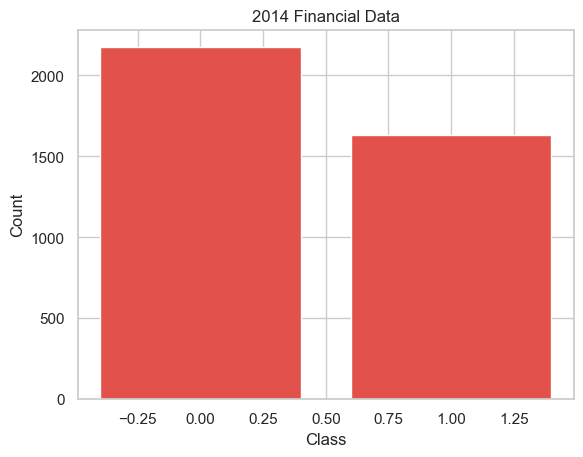

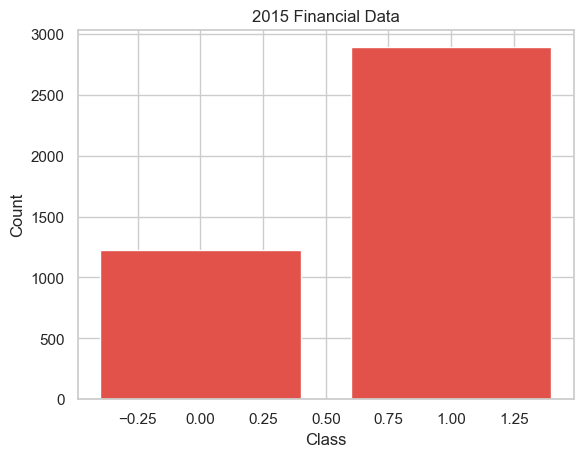

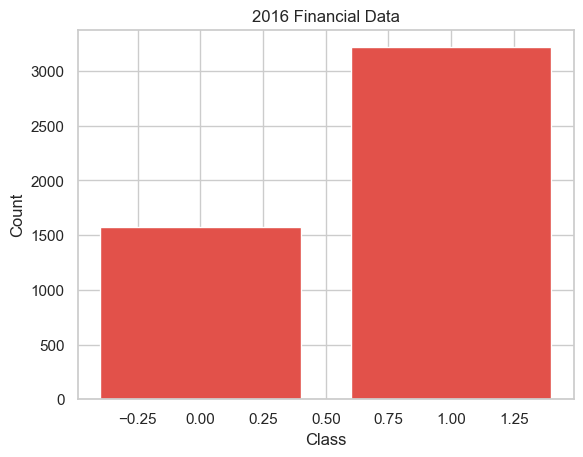

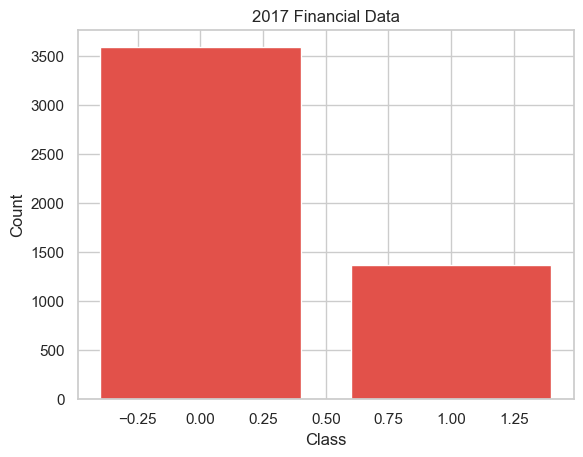

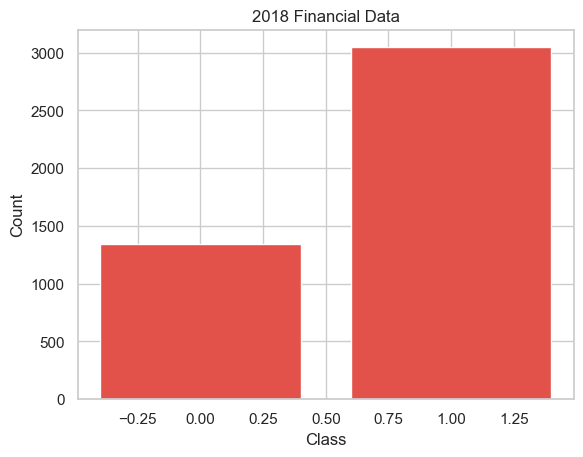

In [21]:
# Create a list of all the counts
counts = [count_2014, count_2015, count_2016, count_2017, count_2018]

# Create a list of years
years = [2014, 2015, 2016, 2017, 2018]

# Plot the counts for each year
for i in range(len(counts)):
    plt.bar(counts[i].index, counts[i].values)
    plt.title(str(years[i]) + " Financial Data")
    plt.xlabel("Class")
    plt.ylabel("Count")
    plt.show()

In [22]:
# Count the unique values of 'Class' column in each dataframe
count_2014 = df_2014['Class'].value_counts()
count_2015 = df_2015['Class'].value_counts()
count_2016 = df_2016['Class'].value_counts()
count_2017 = df_2017['Class'].value_counts()
count_2018 = df_2018['Class'].value_counts()

# Create a new DataFrame to store the counts for each year
counts_df = pd.DataFrame({'2014': count_2014,
                          '2015': count_2015,
                          '2016': count_2016,
                          '2017': count_2017,
                          '2018': count_2018})

# Display the counts for each year side by side
print(counts_df)


   2014  2015  2016  2017  2018
0  2174  1229  1579  3590  1346
1  1634  2891  3218  1370  3046


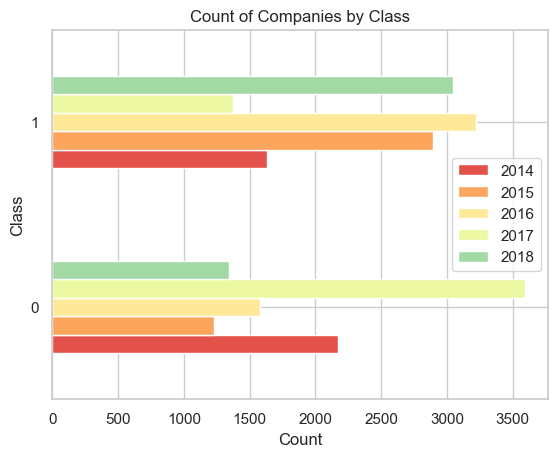

In [23]:
# Create a horizontal bar chart for the counts
counts_df.plot(kind='barh')

# Set the title and axis labels
plt.title('Count of Companies by Class')
plt.xlabel('Count')
plt.ylabel('Class')

# Show the plot
plt.show()


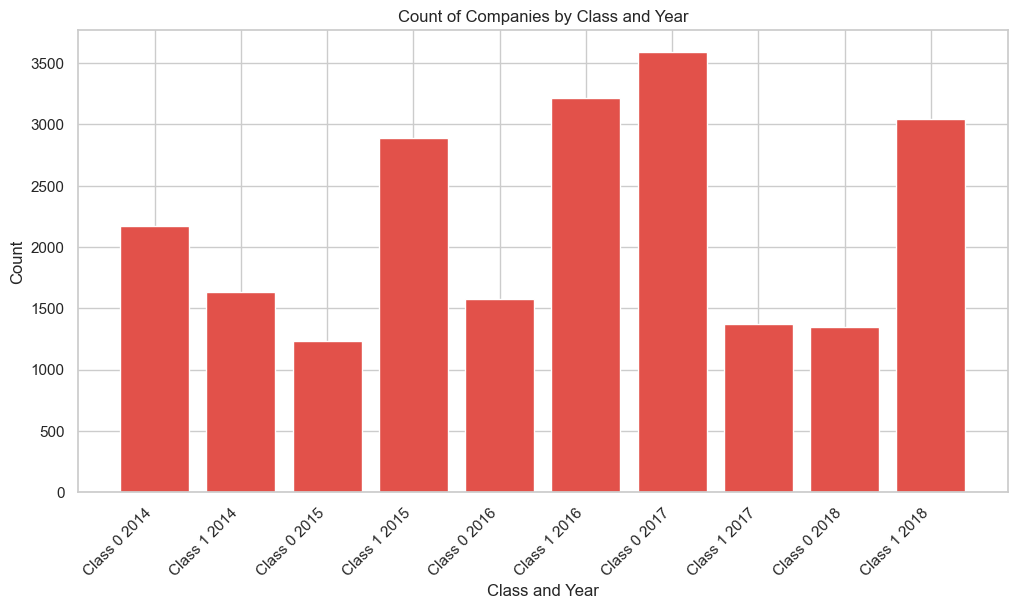

In [24]:
import matplotlib.pyplot as plt

# Create a list of the counts for each year and class
counts = [count_2014[0], count_2014[1], count_2015[0], count_2015[1], count_2016[0], count_2016[1], count_2017[0], count_2017[1], count_2018[0], count_2018[1]]

# Create a list of the labels for the x-axis
labels = ['Class 0 2014', 'Class 1 2014', 'Class 0 2015', 'Class 1 2015', 'Class 0 2016', 'Class 1 2016', 'Class 0 2017', 'Class 1 2017', 'Class 0 2018', 'Class 1 2018']

# Set the size of the figure
plt.figure(figsize=(12, 6))

# Create a bar plot with the counts
plt.bar(labels, counts)

# Set the rotation of the x-axis labels
plt.xticks(rotation=45, ha='right')

# Set the title and axis labels
plt.title('Count of Companies by Class and Year')
plt.xlabel('Class and Year')
plt.ylabel('Count')

# Show the plot
plt.show()


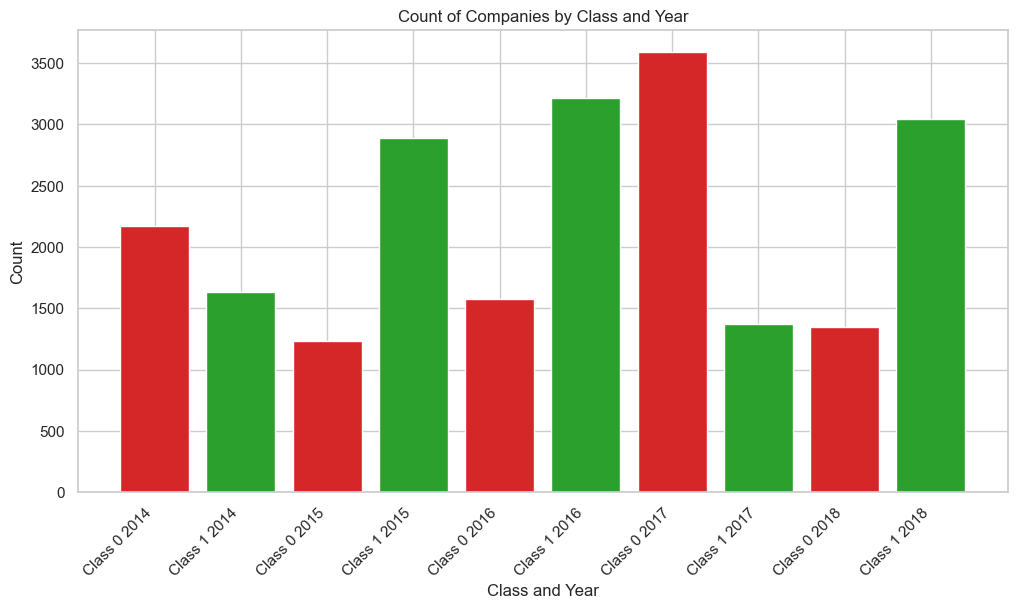

In [25]:
# Create a list of the counts for each year and class
counts = [count_2014[0], count_2014[1], count_2015[0], count_2015[1], count_2016[0], count_2016[1], count_2017[0], count_2017[1], count_2018[0], count_2018[1]]

# Create a list of the colors for each bar
colors = ['tab:red', 'tab:green', 'tab:red', 'tab:green', 'tab:red', 'tab:green', 'tab:red', 'tab:green', 'tab:red', 'tab:green']

# Create a list of the labels for the x-axis
labels = ['Class 0 2014', 'Class 1 2014', 'Class 0 2015', 'Class 1 2015', 'Class 0 2016', 'Class 1 2016', 'Class 0 2017', 'Class 1 2017', 'Class 0 2018', 'Class 1 2018']

# Set the size of the figure
plt.figure(figsize=(12, 6))

# Create a bar plot with the counts and colors
plt.bar(labels, counts, color=colors)

# Set the rotation of the x-axis labels
plt.xticks(rotation=45, ha='right')

# Set the title and axis labels
plt.title('Count of Companies by Class and Year')
plt.xlabel('Class and Year')
plt.ylabel('Count')

# Show the plot
plt.show()


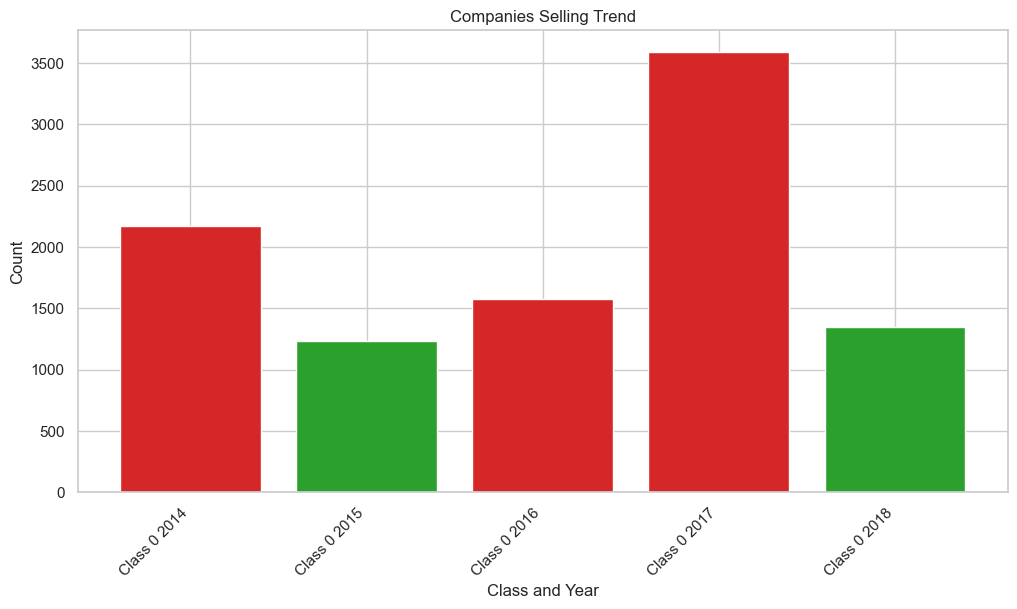

In [26]:
# Create a list of the counts for each year and class
counts0 = [count_2014[0], count_2015[0], count_2016[0], count_2017[0], count_2018[0]]

# Create a list of the colors for each bar
colors = ['tab:red', 'tab:green', 'tab:red', 'tab:red', 'tab:green']

# Create a list of the labels for the x-axis
labels = ['Class 0 2014', 'Class 0 2015', 'Class 0 2016', 'Class 0 2017', 'Class 0 2018']

# Set the size of the figure
plt.figure(figsize=(12, 6))

# Create a bar plot with the counts and colors
plt.bar(labels, counts0, color=colors)

# Set the rotation of the x-axis labels
plt.xticks(rotation=45, ha='right')

# Set the title and axis labels
plt.title('Companies Selling Trend')
plt.xlabel('Class and Year')
plt.ylabel('Count')

# Show the plot
plt.show()

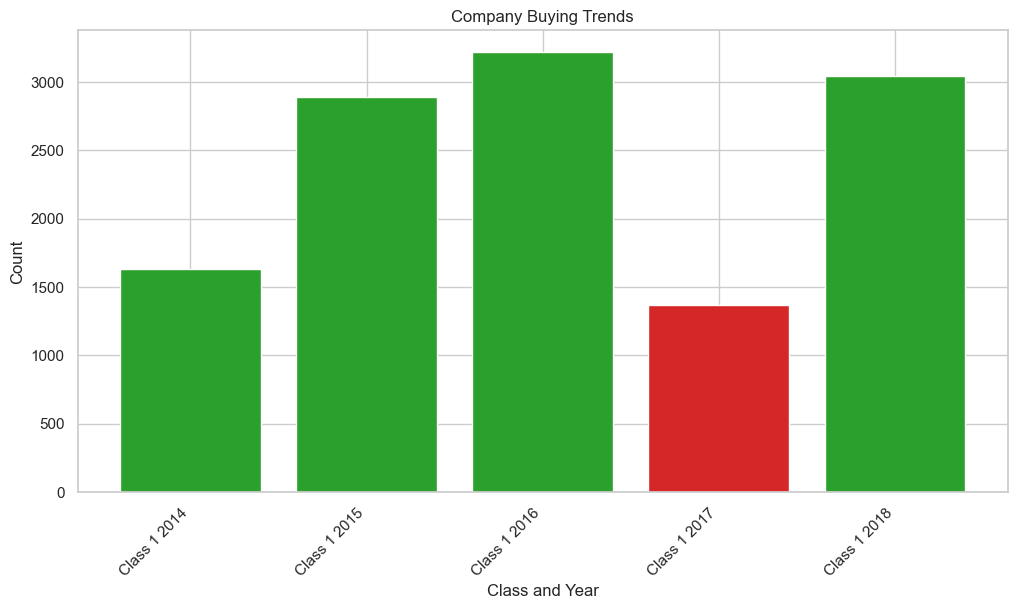

In [27]:
# Create a list of the counts for each year and class
counts1 = [count_2014[1], count_2015[1], count_2016[1], count_2017[1], count_2018[1]]

# Create a list of the colors for each bar
colors = ['tab:green', 'tab:green', 'tab:green', 'tab:red', 'tab:green']

# Create a list of the labels for the x-axis
labels = ['Class 1 2014', 'Class 1 2015', 'Class 1 2016', 'Class 1 2017', 'Class 1 2018']

# Set the size of the figure
plt.figure(figsize=(12, 6))

# Create a bar plot with the counts and colors
plt.bar(labels, counts1, color=colors)

# Set the rotation of the x-axis labels
plt.xticks(rotation=45, ha='right')

# Set the title and axis labels
plt.title('Company Buying Trends')
plt.xlabel('Class and Year')
plt.ylabel('Count')

# Show the plot
plt.show()

In [28]:
df_2014['Sector'].value_counts()

Financial Services        660
Healthcare                582
Technology                576
Industrials               501
Consumer Cyclical         457
Basic Materials           242
Real Estate               224
Energy                    221
Consumer Defensive        165
Utilities                  97
Communication Services     83
Name: Sector, dtype: int64

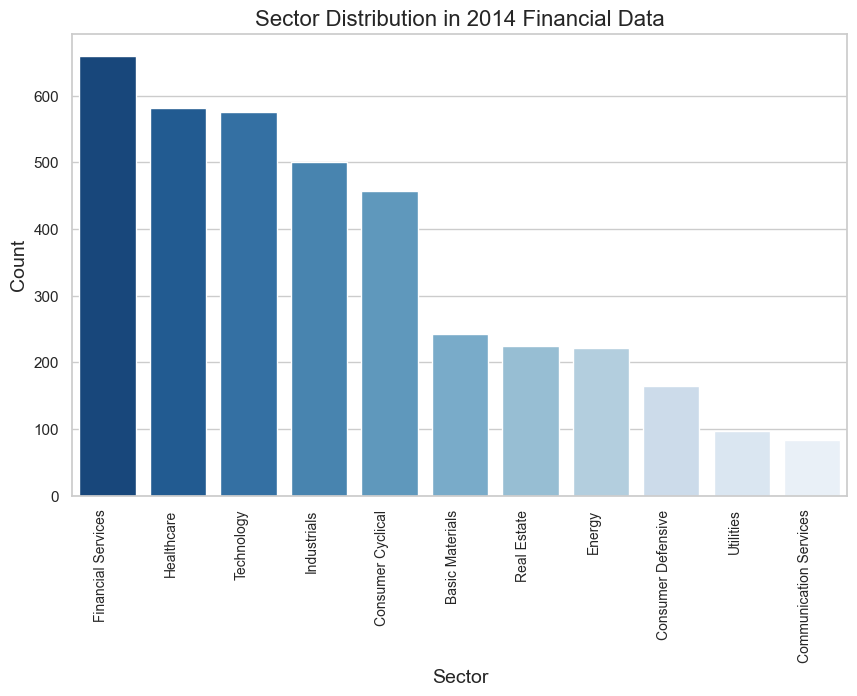

In [29]:
# Plot sector distribution
df_sector14 = df_2014['Sector'].value_counts()
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=df_sector14.index.values.tolist(), y=df_sector14, palette='Blues_r')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right", fontsize=10)
plt.title('Sector Distribution in 2014 Financial Data', fontsize=16)
plt.xlabel('Sector', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()


In [30]:
df_2015['Sector'].value_counts()

Financial Services        769
Healthcare                628
Technology                606
Industrials               532
Consumer Cyclical         479
Basic Materials           265
Real Estate               240
Energy                    236
Consumer Defensive        175
Utilities                 103
Communication Services     87
Name: Sector, dtype: int64

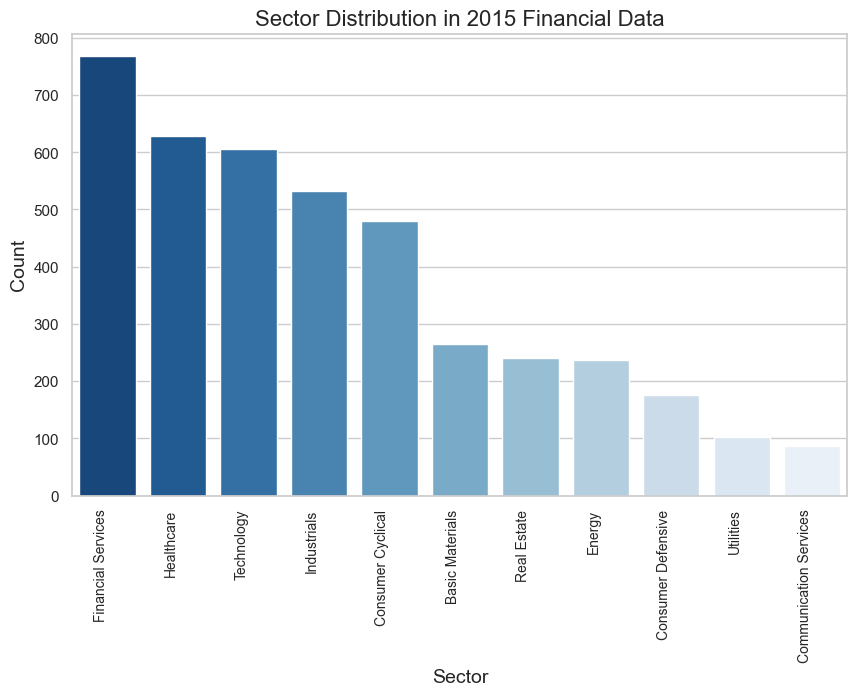

In [31]:
# Plot sector distribution
df_sector15 = df_2015['Sector'].value_counts()
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=df_sector15.index.values.tolist(), y=df_sector15, palette='Blues_r')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right", fontsize=10)
plt.title('Sector Distribution in 2015 Financial Data', fontsize=16)
plt.xlabel('Sector', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

In [32]:
df_2016['Sector'].value_counts()

Financial Services        1220
Healthcare                 686
Technology                 643
Industrials                566
Consumer Cyclical          509
Basic Materials            279
Real Estate                258
Energy                     246
Consumer Defensive         192
Utilities                  106
Communication Services      92
Name: Sector, dtype: int64

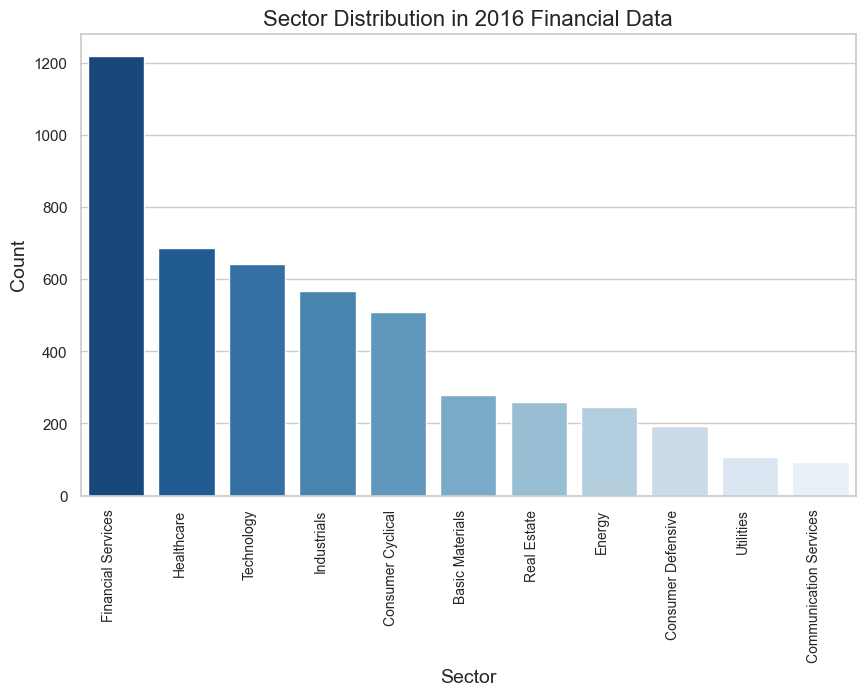

In [33]:
# Plot sector distribution
df_sector16 = df_2016['Sector'].value_counts()
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=df_sector16.index.values.tolist(), y=df_sector16, palette='Blues_r')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right", fontsize=10)
plt.title('Sector Distribution in 2016 Financial Data', fontsize=16)
plt.xlabel('Sector', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

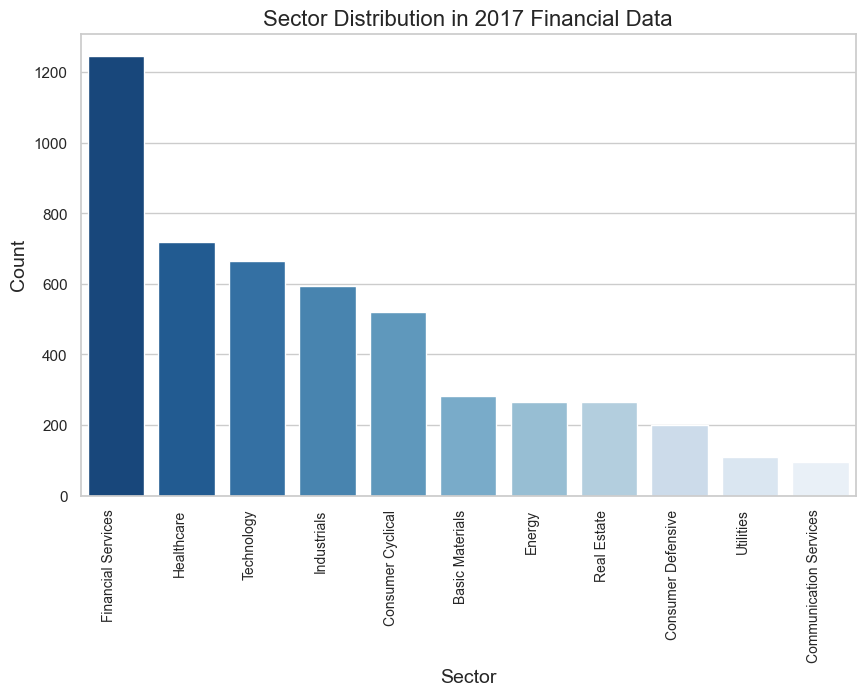

In [34]:
# Plot sector distribution
df_sector17 = df_2017['Sector'].value_counts()
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=df_sector17.index.values.tolist(), y=df_sector17, palette='Blues_r')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right", fontsize=10)
plt.title('Sector Distribution in 2017 Financial Data', fontsize=16)
plt.xlabel('Sector', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

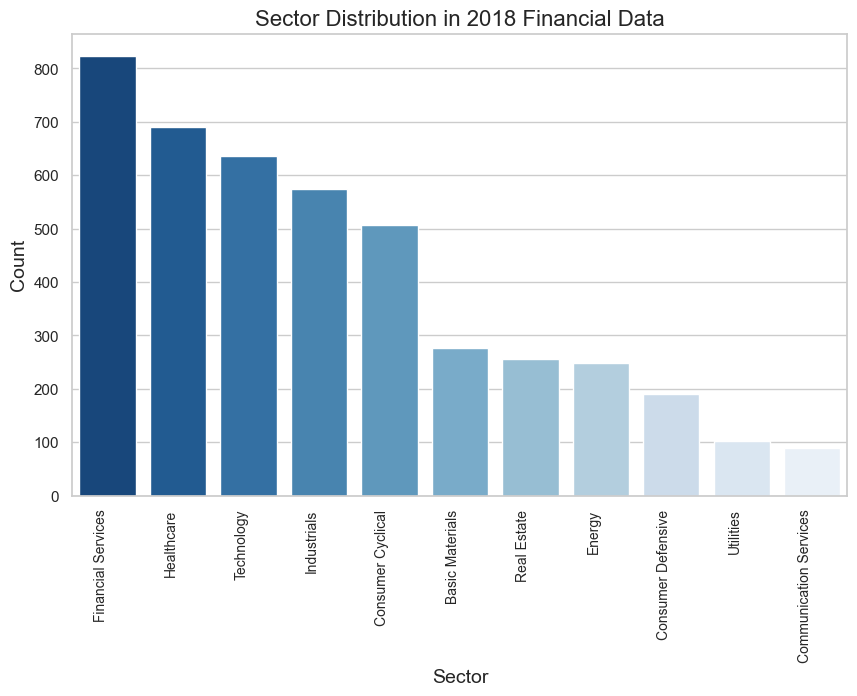

In [35]:
# Plot sector distribution
df_sector18 = df_2018['Sector'].value_counts()
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=df_sector18.index.values.tolist(), y=df_sector18, palette='Blues_r')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right", fontsize=10)
plt.title('Sector Distribution in 2018 Financial Data', fontsize=16)
plt.xlabel('Sector', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

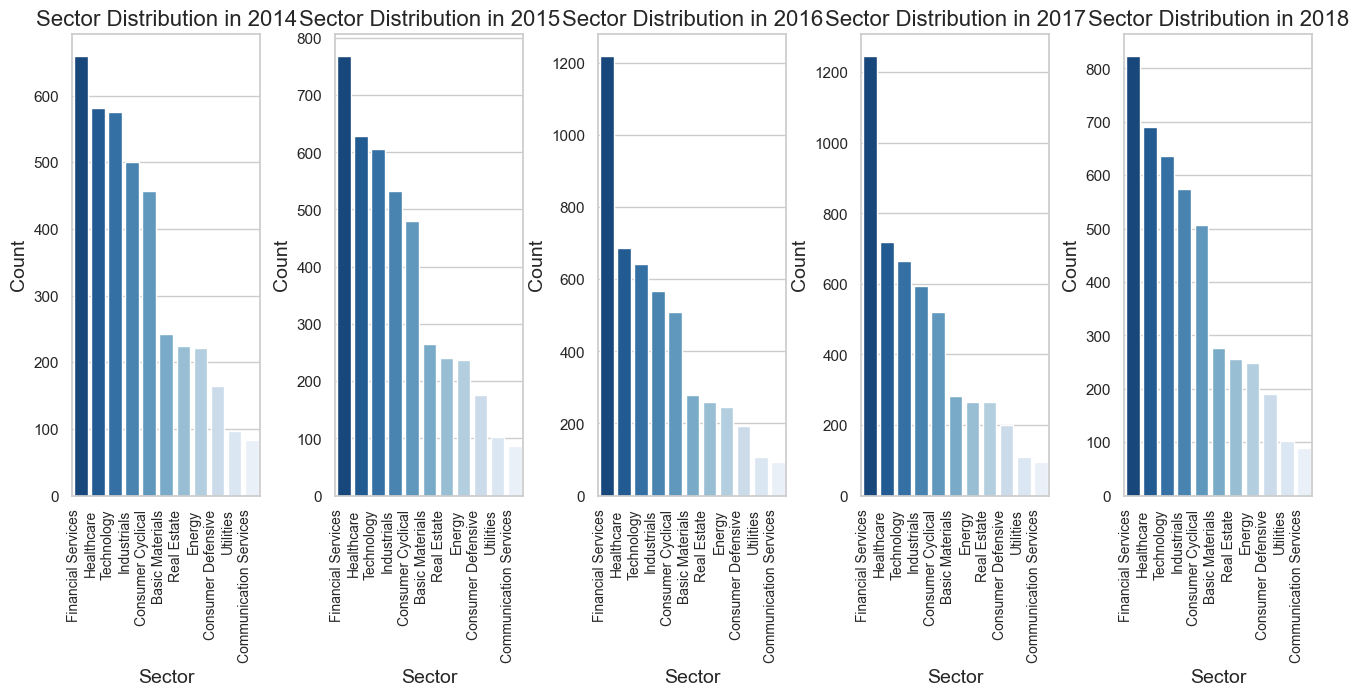

In [36]:

# Get the sector counts for each year
df_sector14 = df_2014['Sector'].value_counts()
df_sector15 = df_2015['Sector'].value_counts()
df_sector16 = df_2016['Sector'].value_counts()
df_sector17 = df_2017['Sector'].value_counts()
df_sector18 = df_2018['Sector'].value_counts()

# Set the figure size
plt.figure(figsize=(16, 6))

# Plot the 2014 data
plt.subplot(151)
ax = sns.barplot(x=df_sector14.index.values.tolist(), y=df_sector14, palette='Blues_r')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right", fontsize=10)
plt.title('Sector Distribution in 2014', fontsize=16)
plt.xlabel('Sector', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Plot the 2015 data
plt.subplot(152)
ax = sns.barplot(x=df_sector15.index.values.tolist(), y=df_sector15, palette='Blues_r')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right", fontsize=10)
plt.title('Sector Distribution in 2015', fontsize=16)
plt.xlabel('Sector', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Plot the 2016 data
plt.subplot(153)
ax = sns.barplot(x=df_sector16.index.values.tolist(), y=df_sector16, palette='Blues_r')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right", fontsize=10)
plt.title('Sector Distribution in 2016', fontsize=16)
plt.xlabel('Sector', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Plot the 2017 data
plt.subplot(154)
ax = sns.barplot(x=df_sector17.index.values.tolist(), y=df_sector17, palette='Blues_r')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right", fontsize=10)
plt.title('Sector Distribution in 2017', fontsize=16)
plt.xlabel('Sector', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Plot the 2018 data
plt.subplot(155)
ax = sns.barplot(x=df_sector18.index.values.tolist(), y=df_sector18, palette='Blues_r')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right", fontsize=10)
plt.title('Sector Distribution in 2018', fontsize=16)
plt.xlabel('Sector', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.4)

# Show the plot
plt.show()

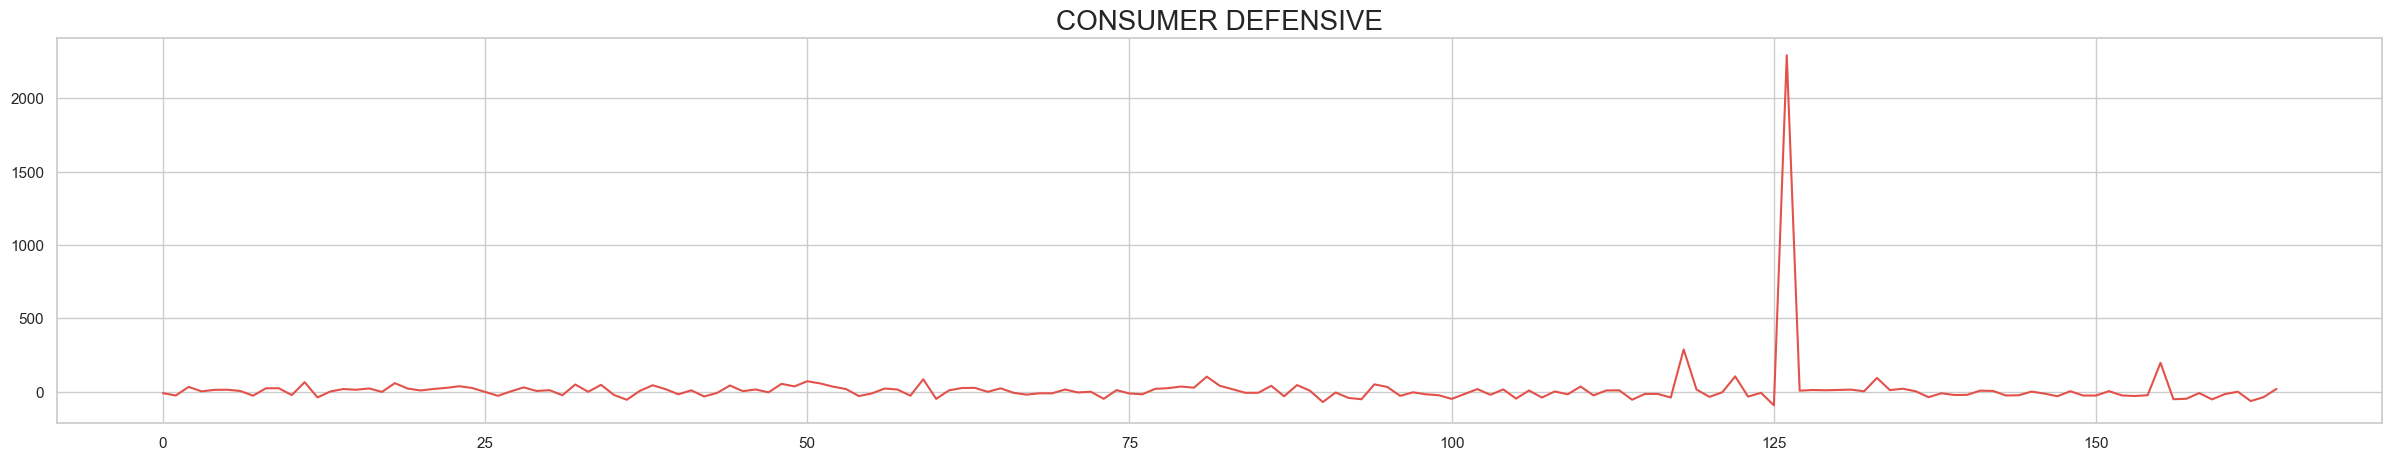

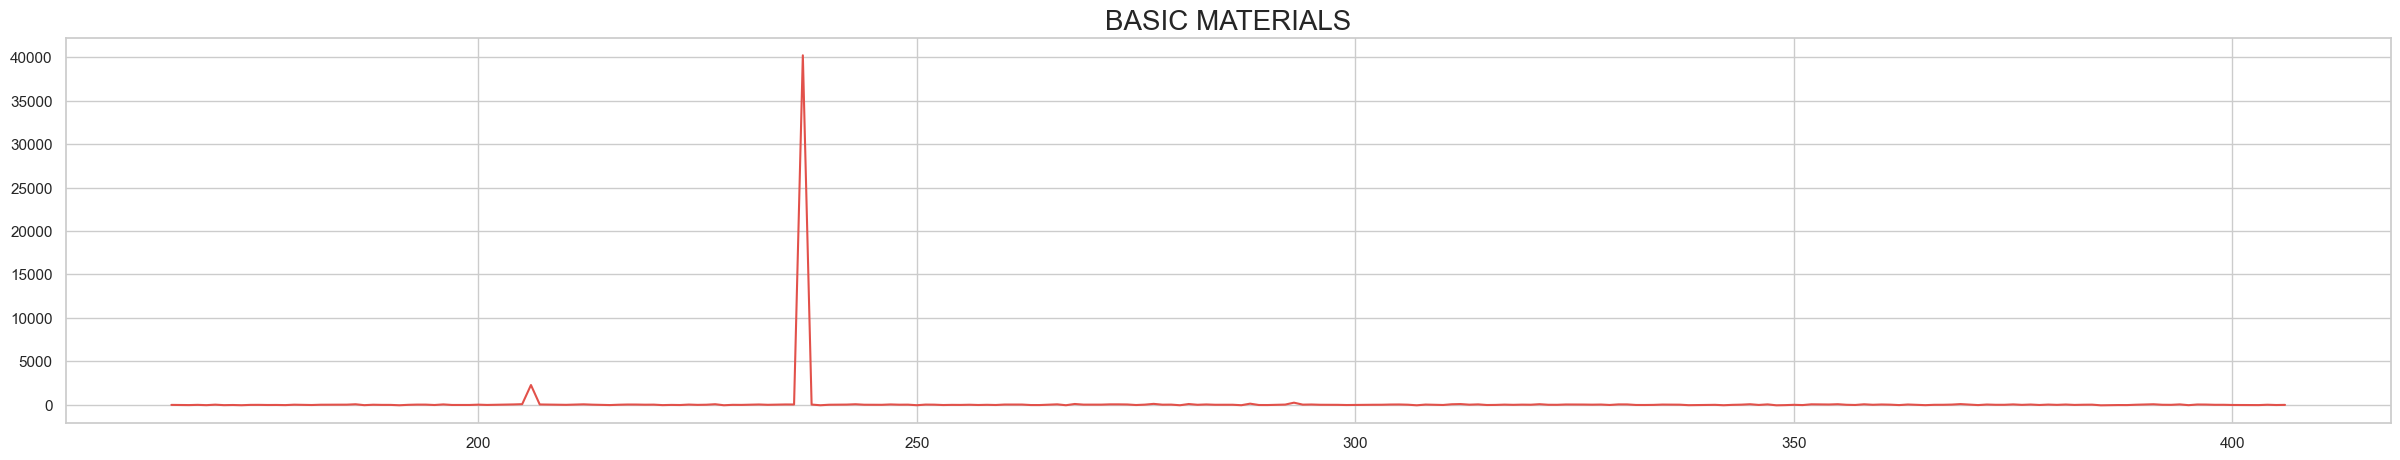

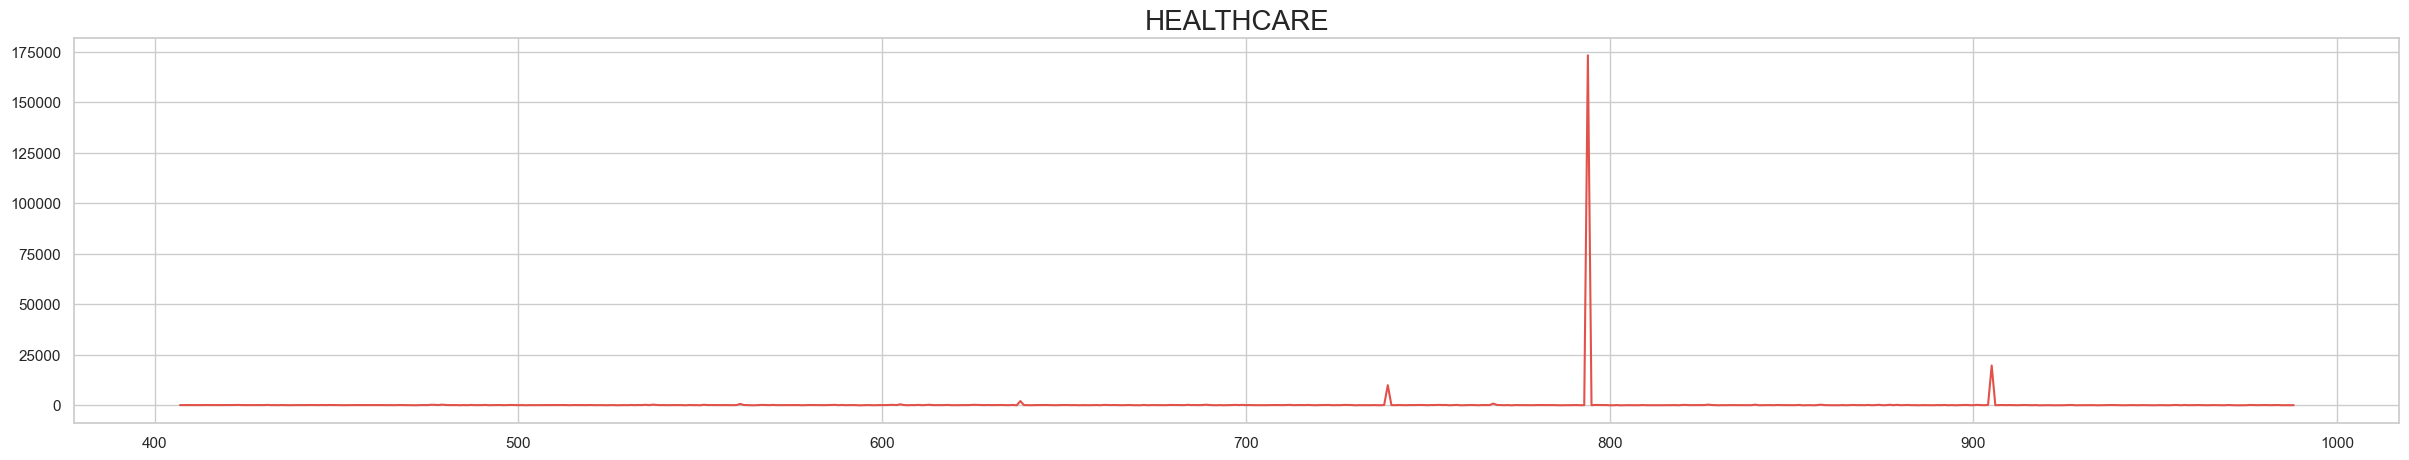

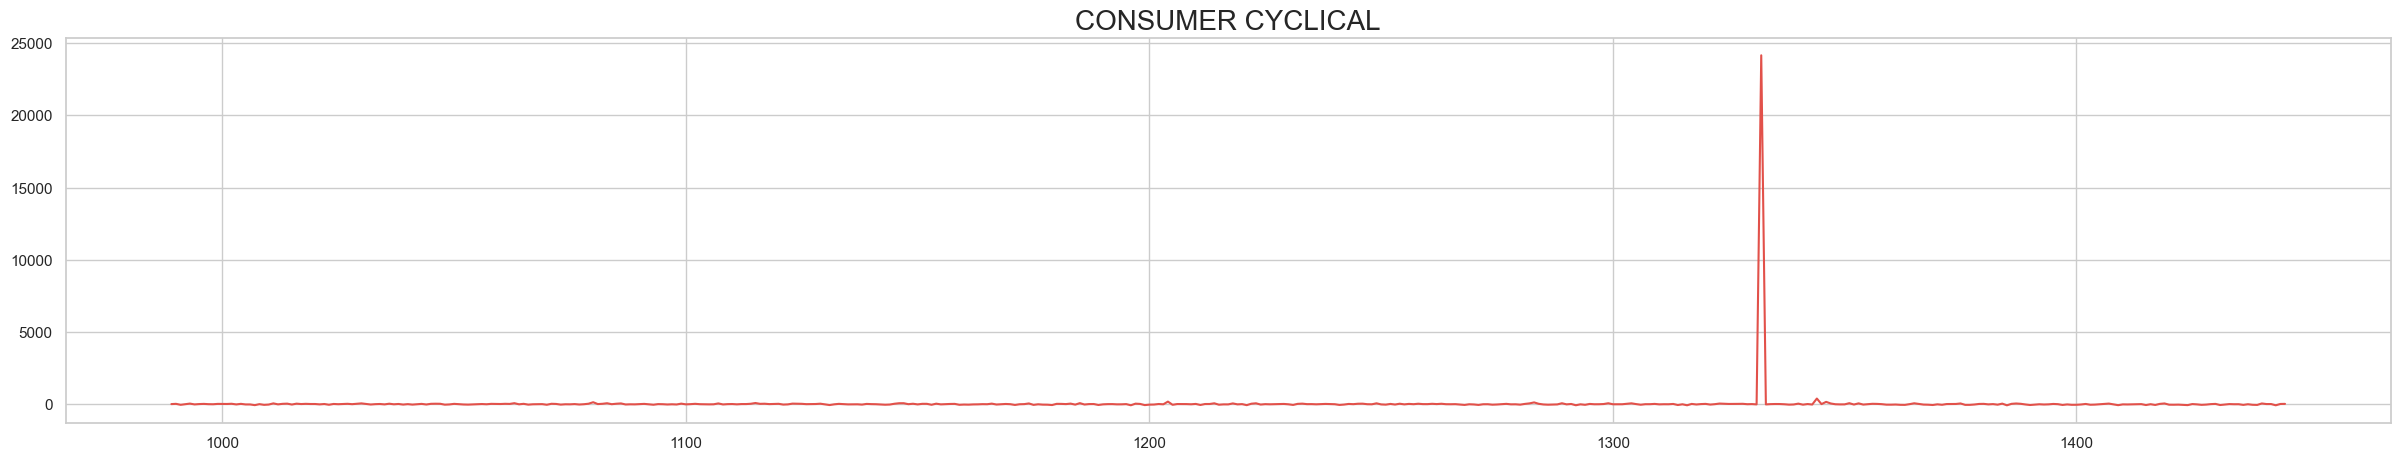

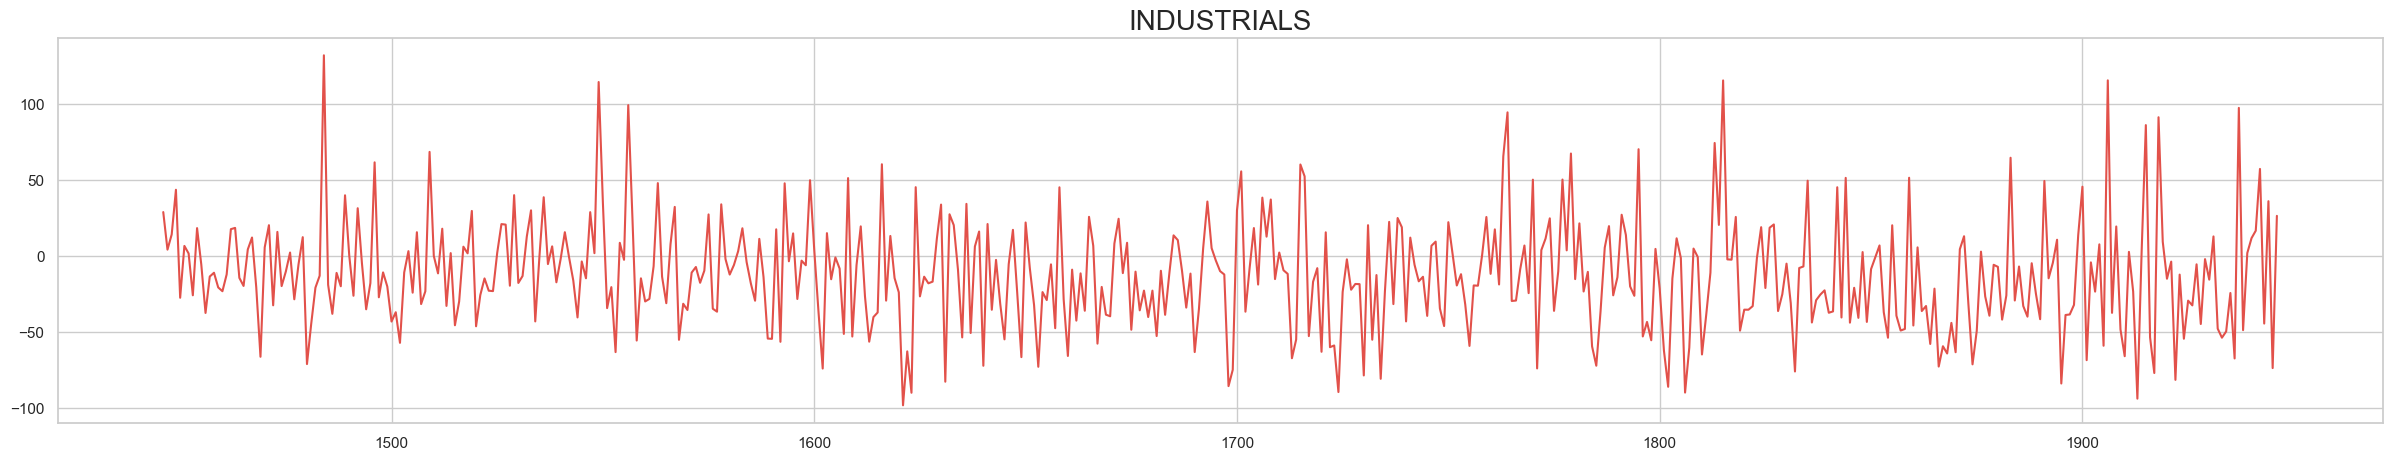

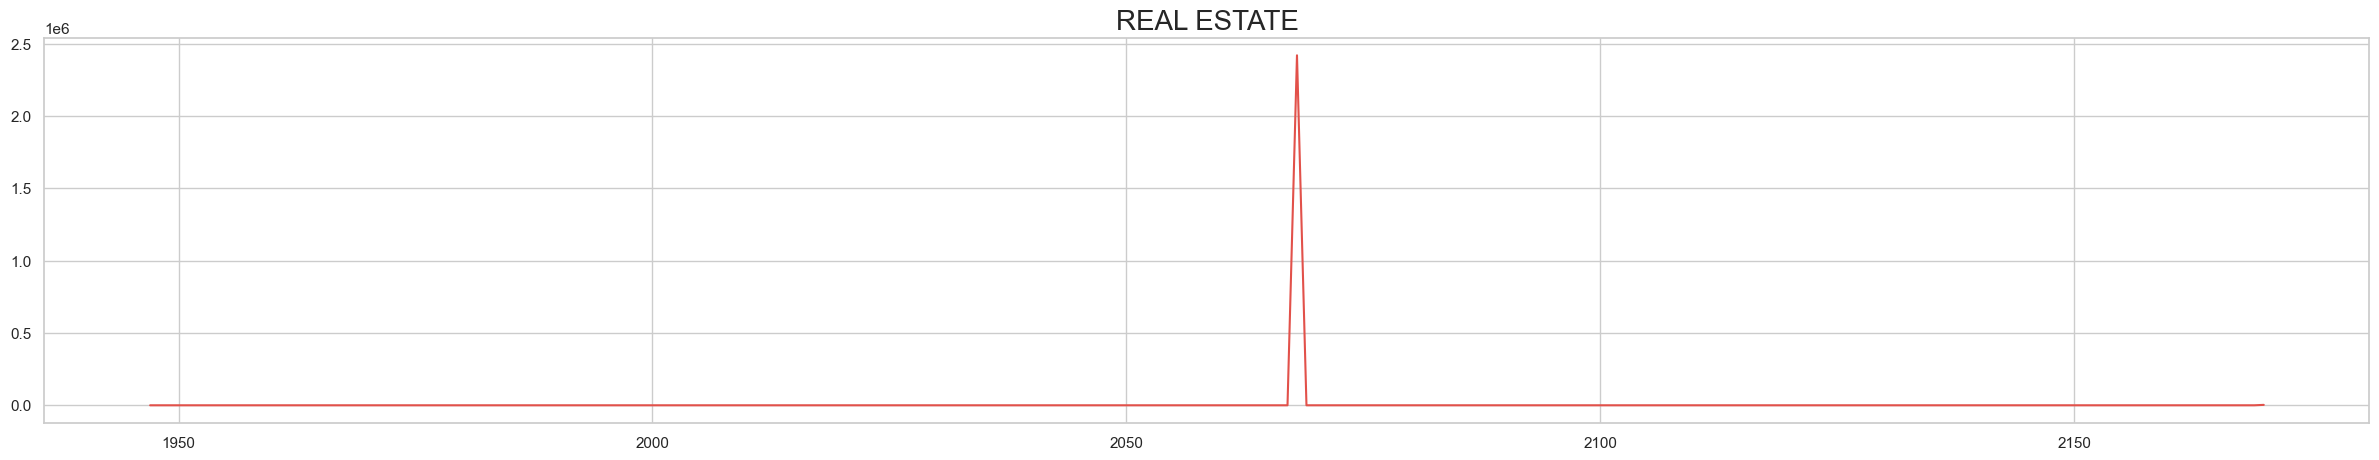

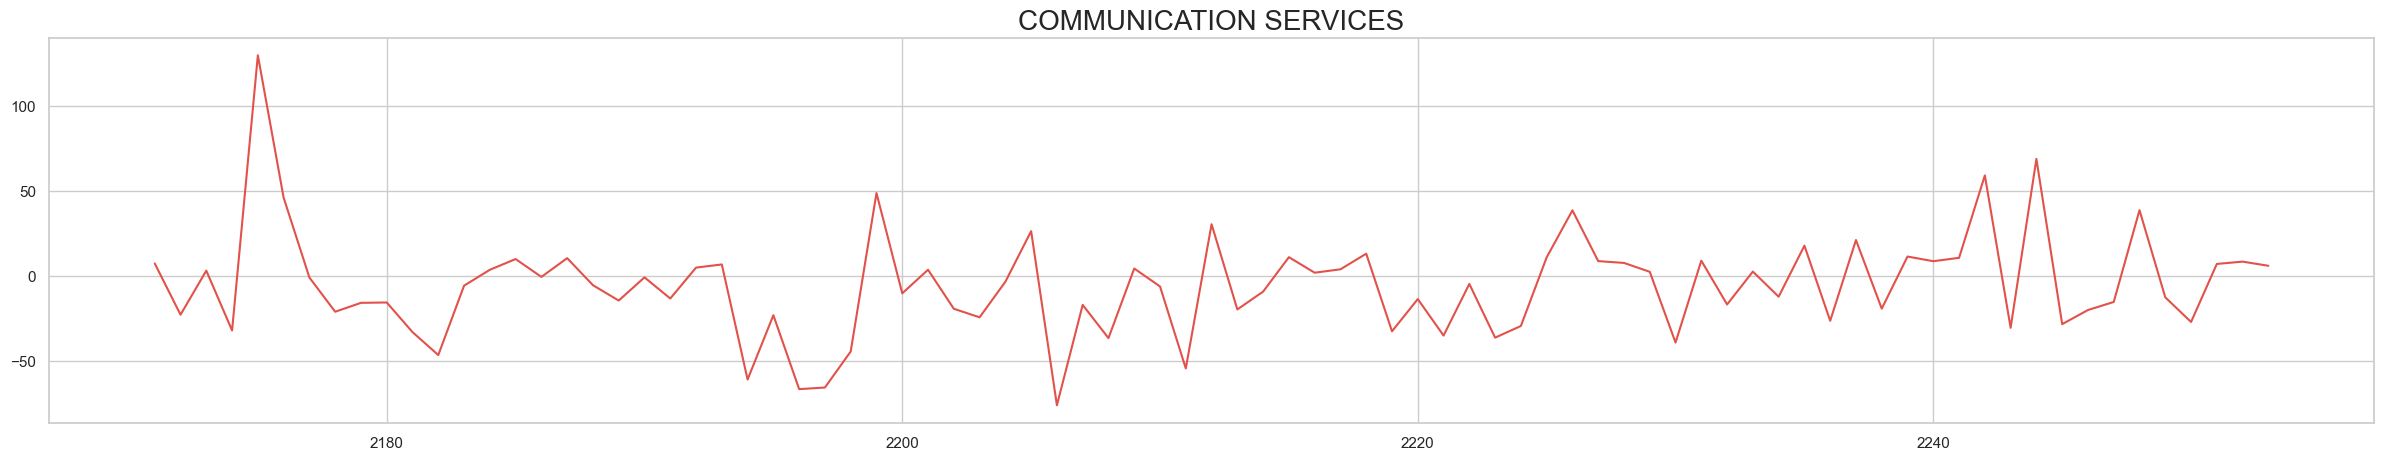

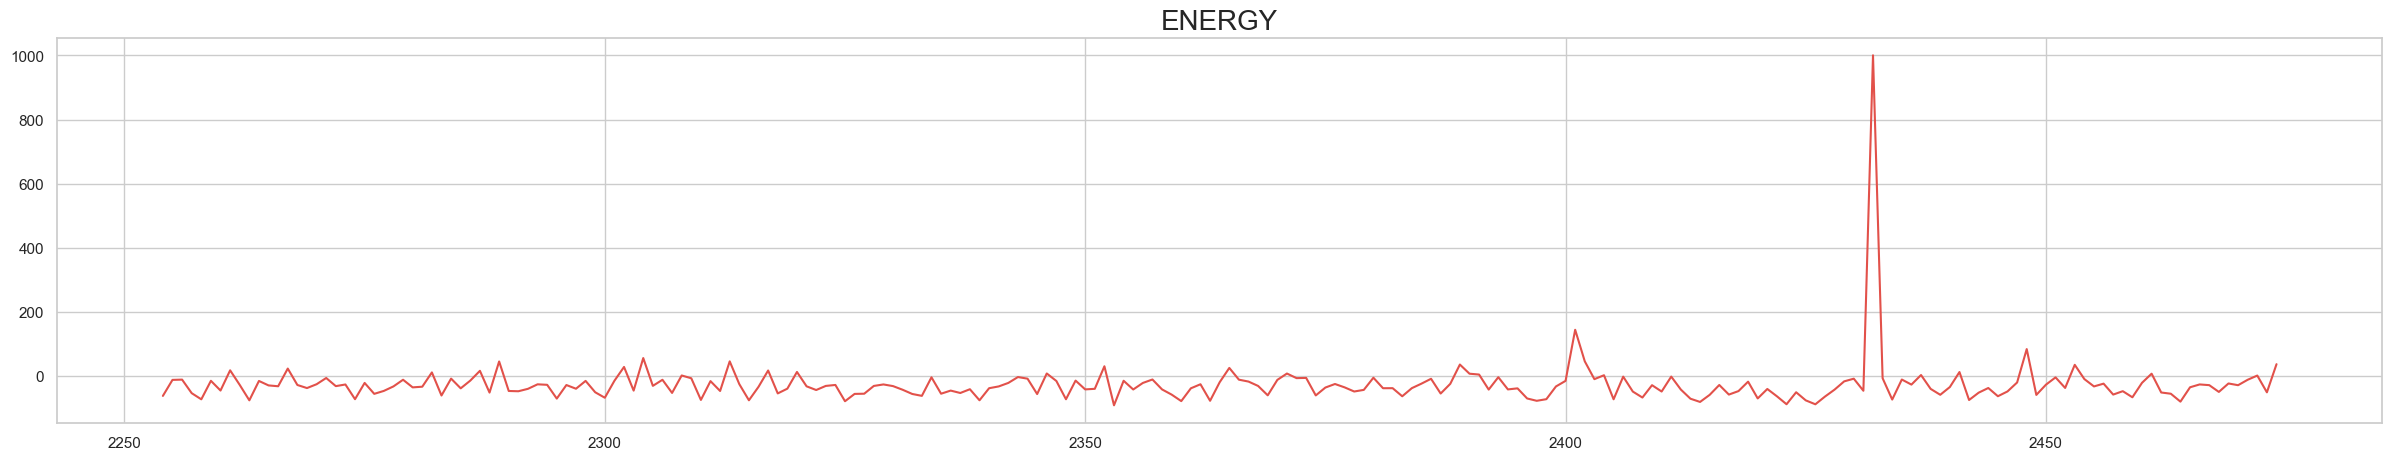

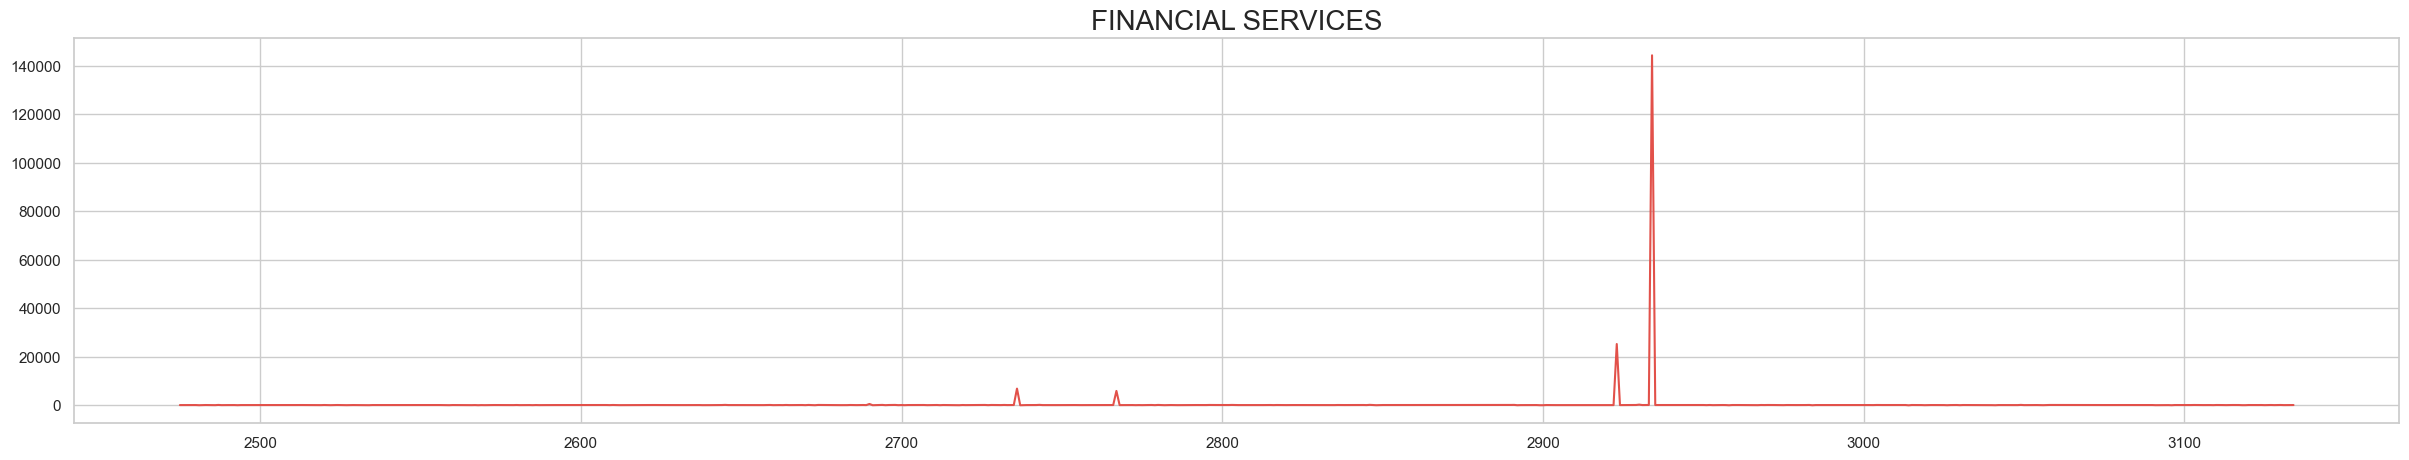

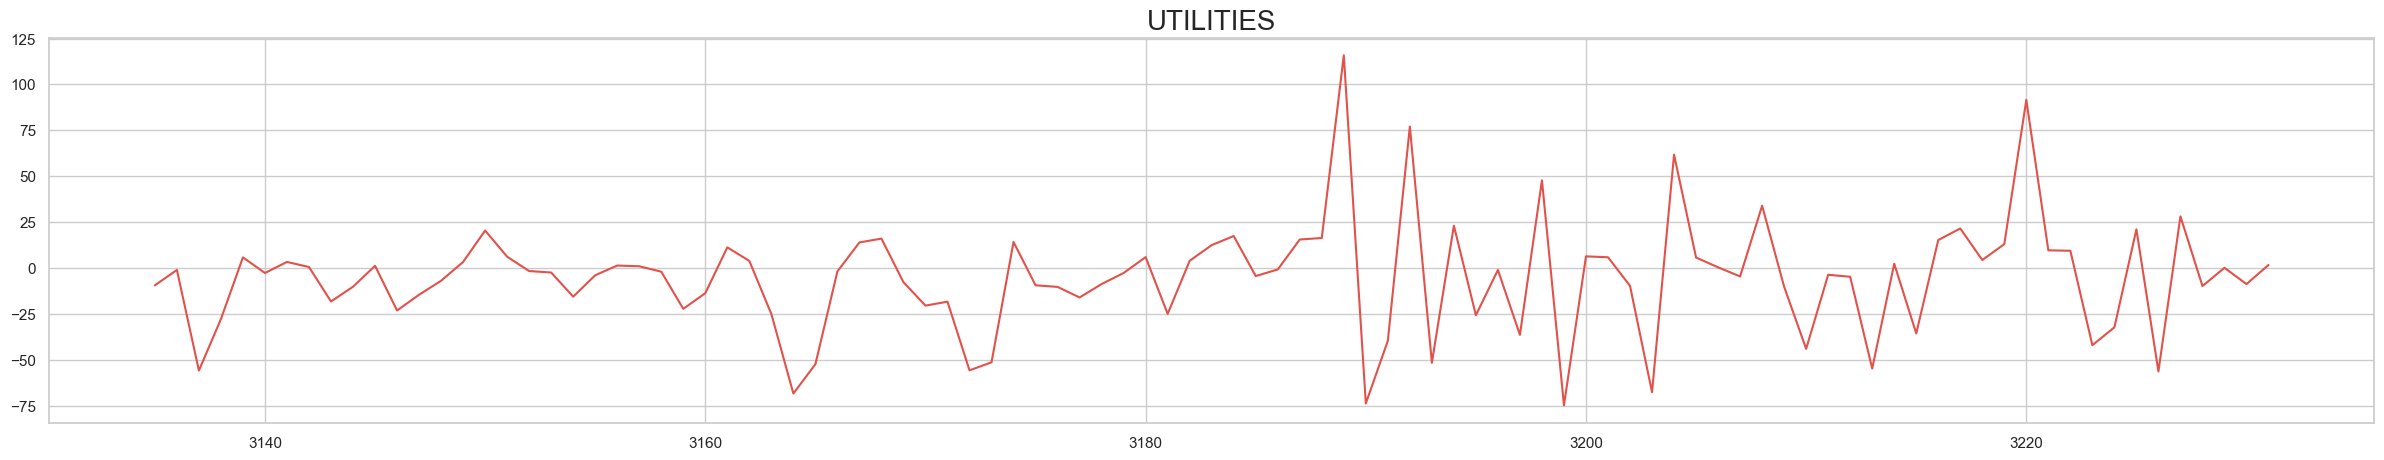

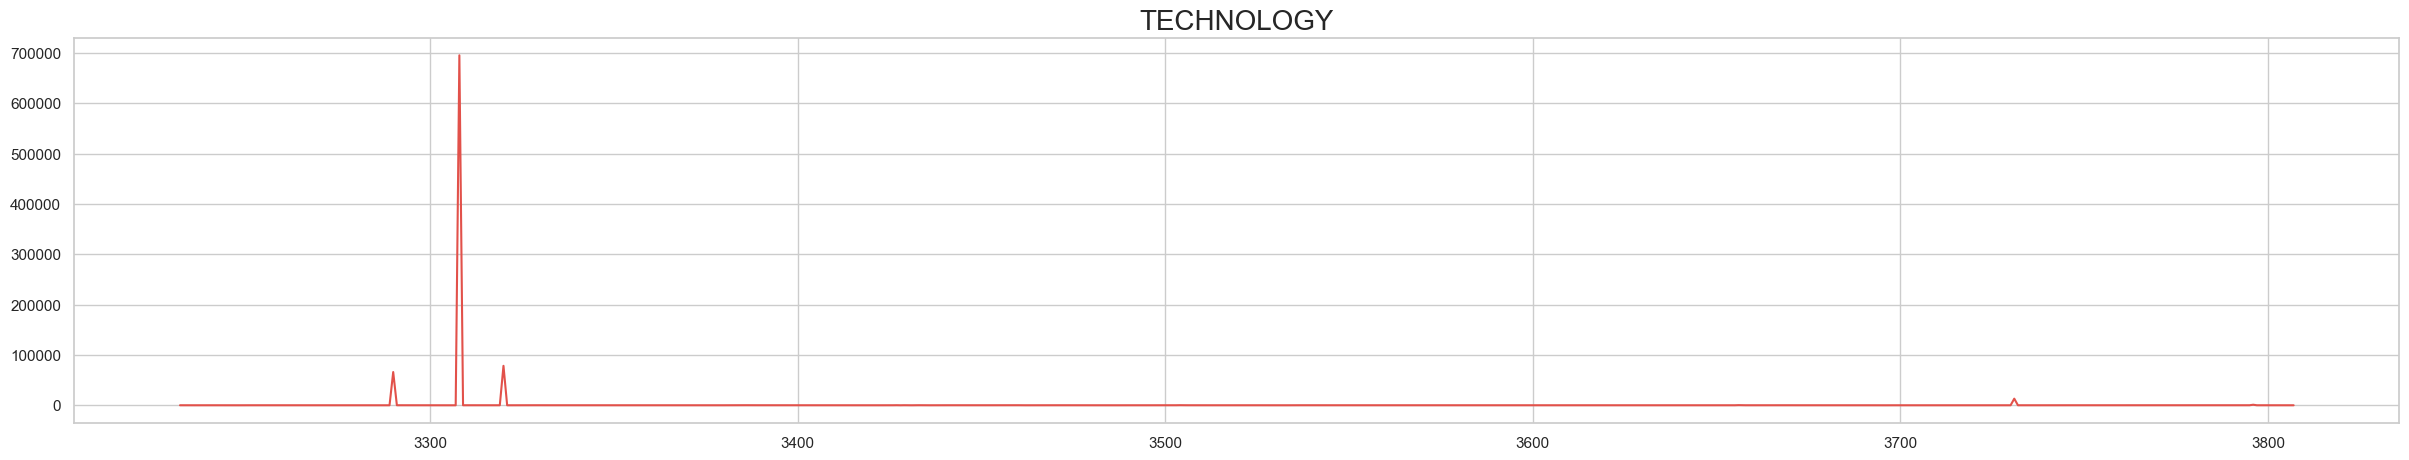

In [37]:
# Extract the columns we need in this step from the dataframe
df_var15 = df_2014.loc[:, ['Sector', '2015 PRICE VAR [%]']]

# Get list of sectors
sector_list14 = df_var15['Sector'].unique()

# Plot the percent price variation for each sector
for sector in sector_list14:
    
    temp = df_var15[df_var15['Sector'] == sector]

    plt.figure(figsize=(30,5))
    plt.plot(temp['2015 PRICE VAR [%]'])
    plt.title(sector.upper(), fontsize=20)
    plt.show()

Unusual Peaks:
    
* Consumer Defensive
* Basic Materials
* Healthcare
* Consumer Cyclical
* Real Estate
* Energy
* Financial Services
* Technology

need to look closer

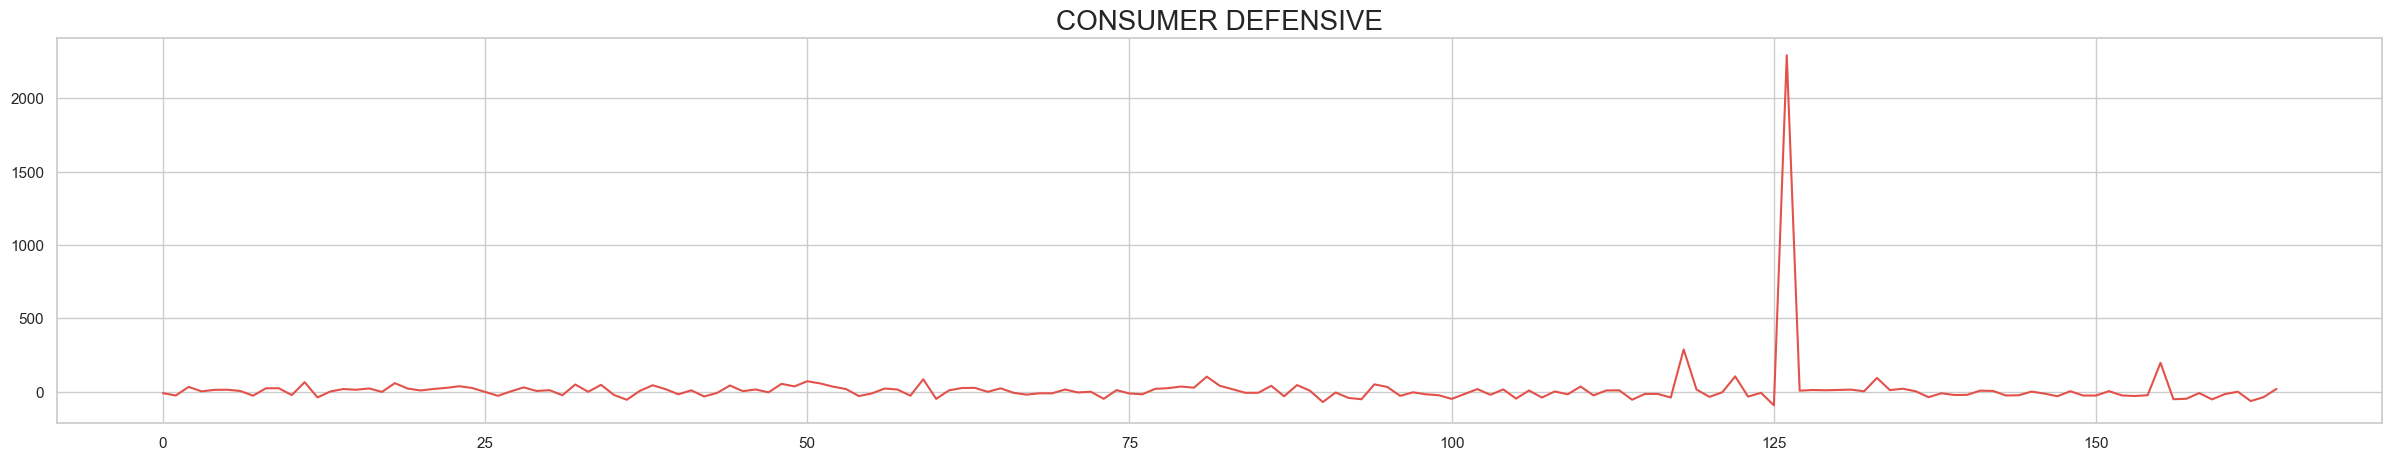

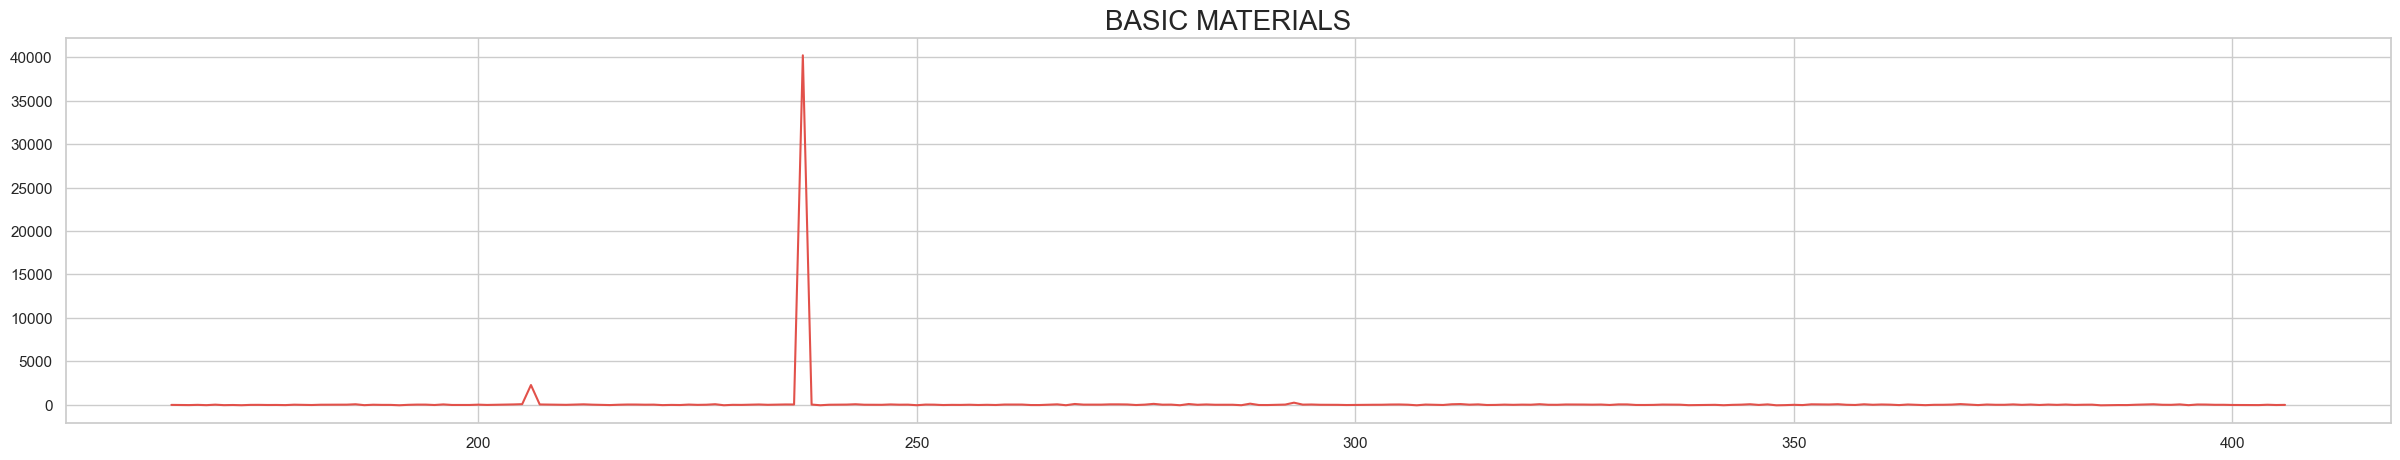

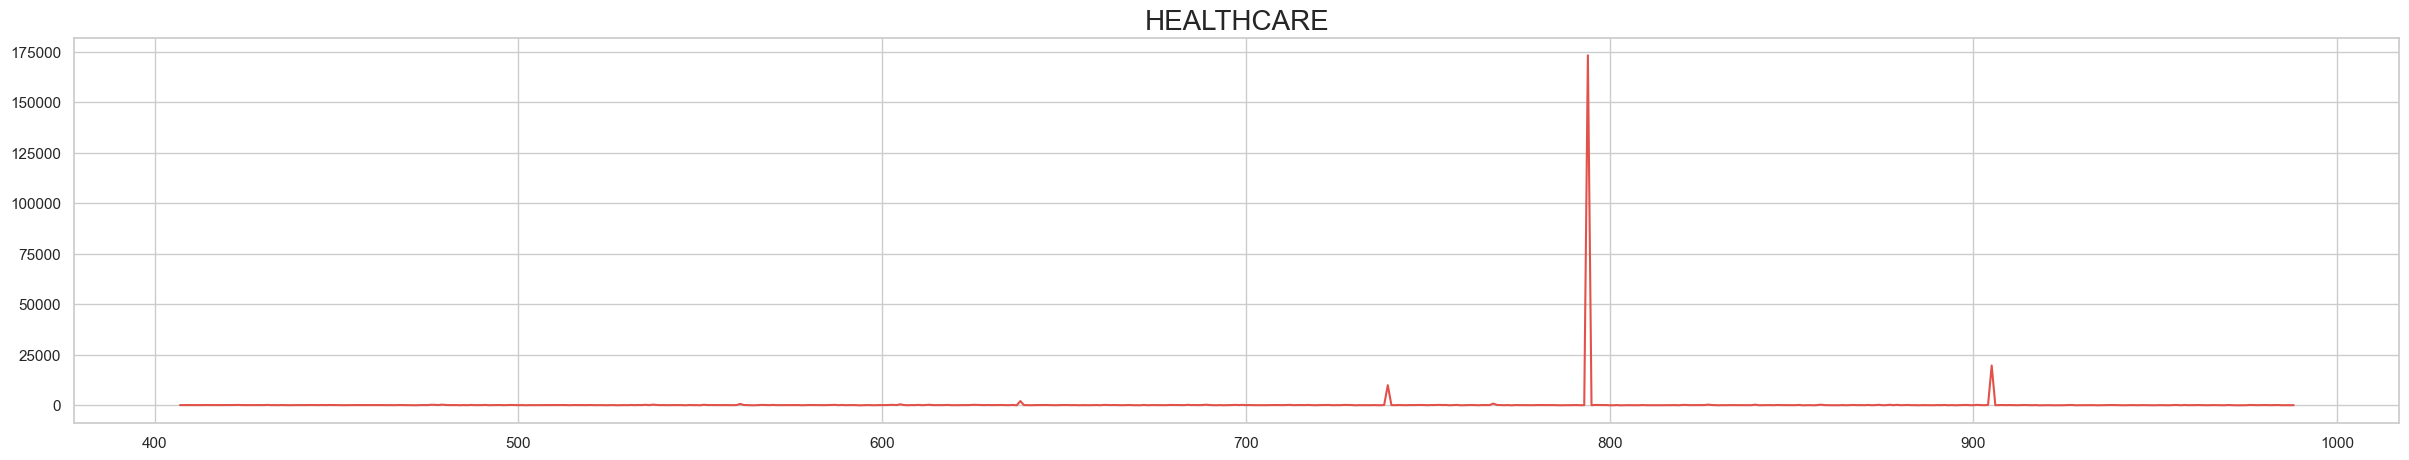

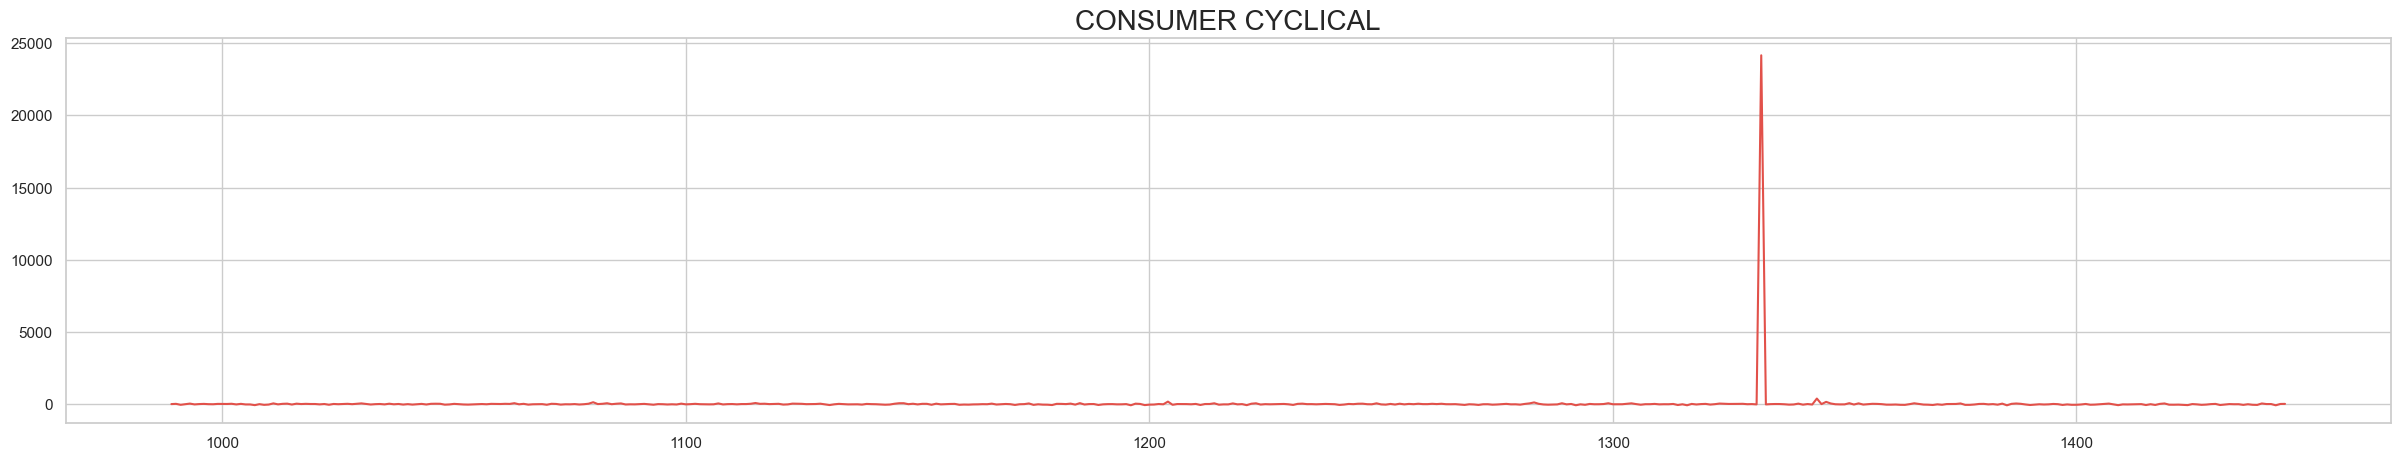

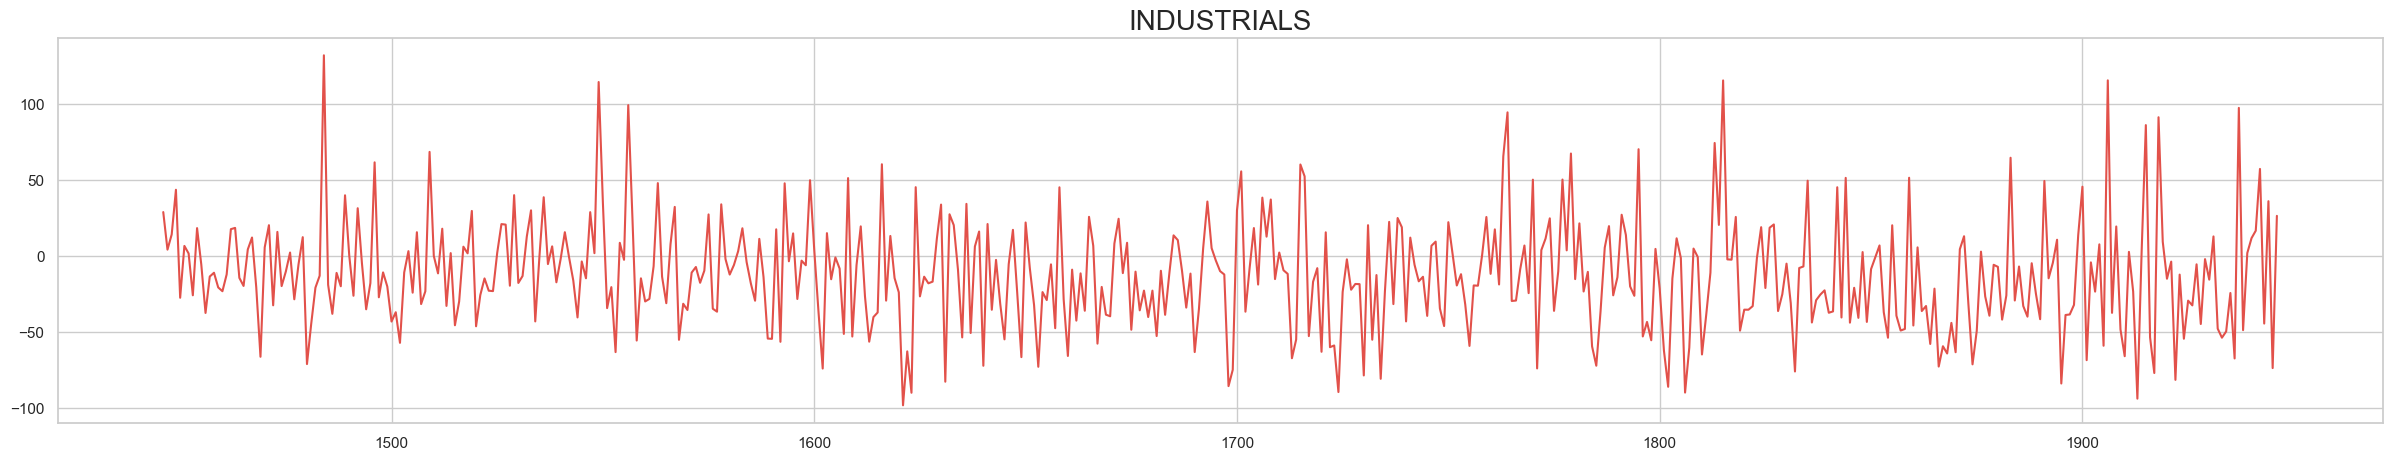

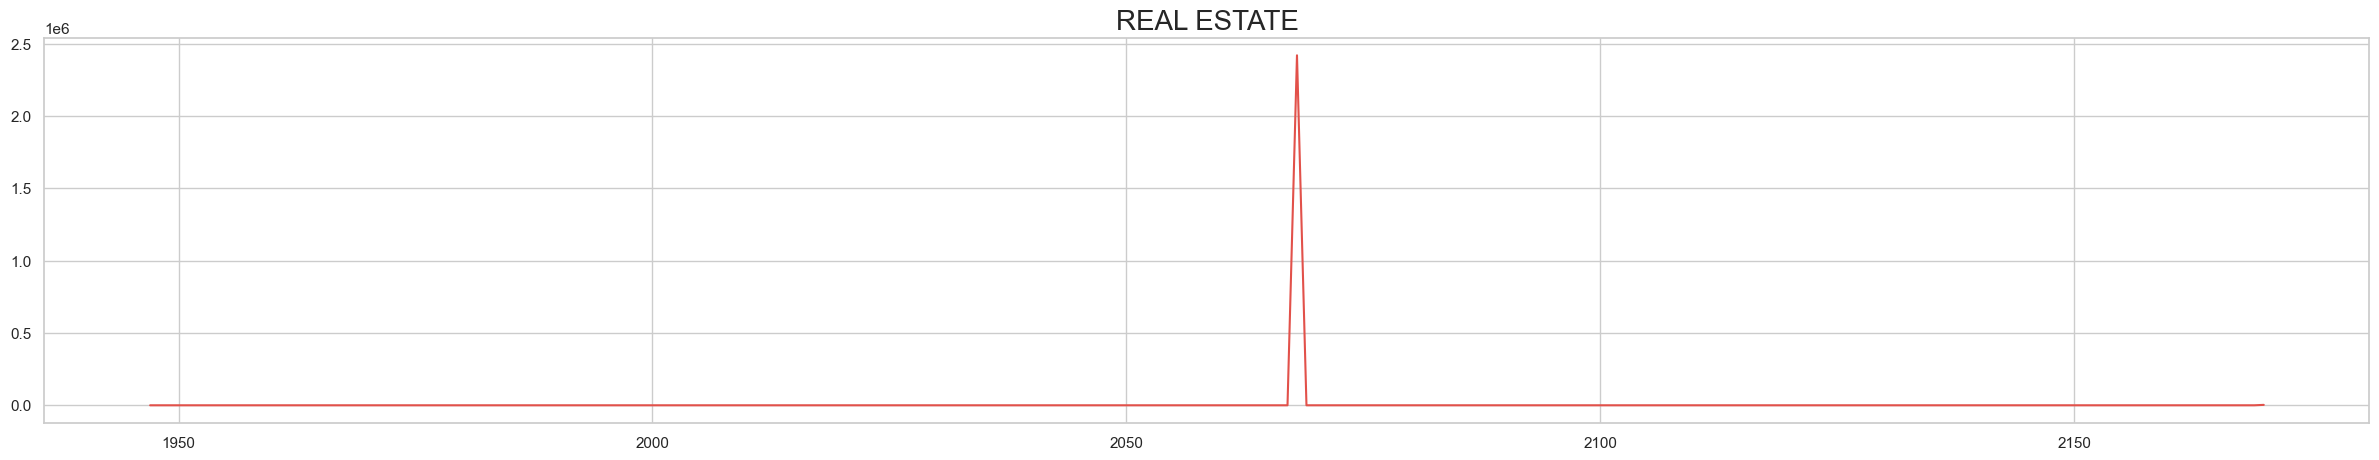

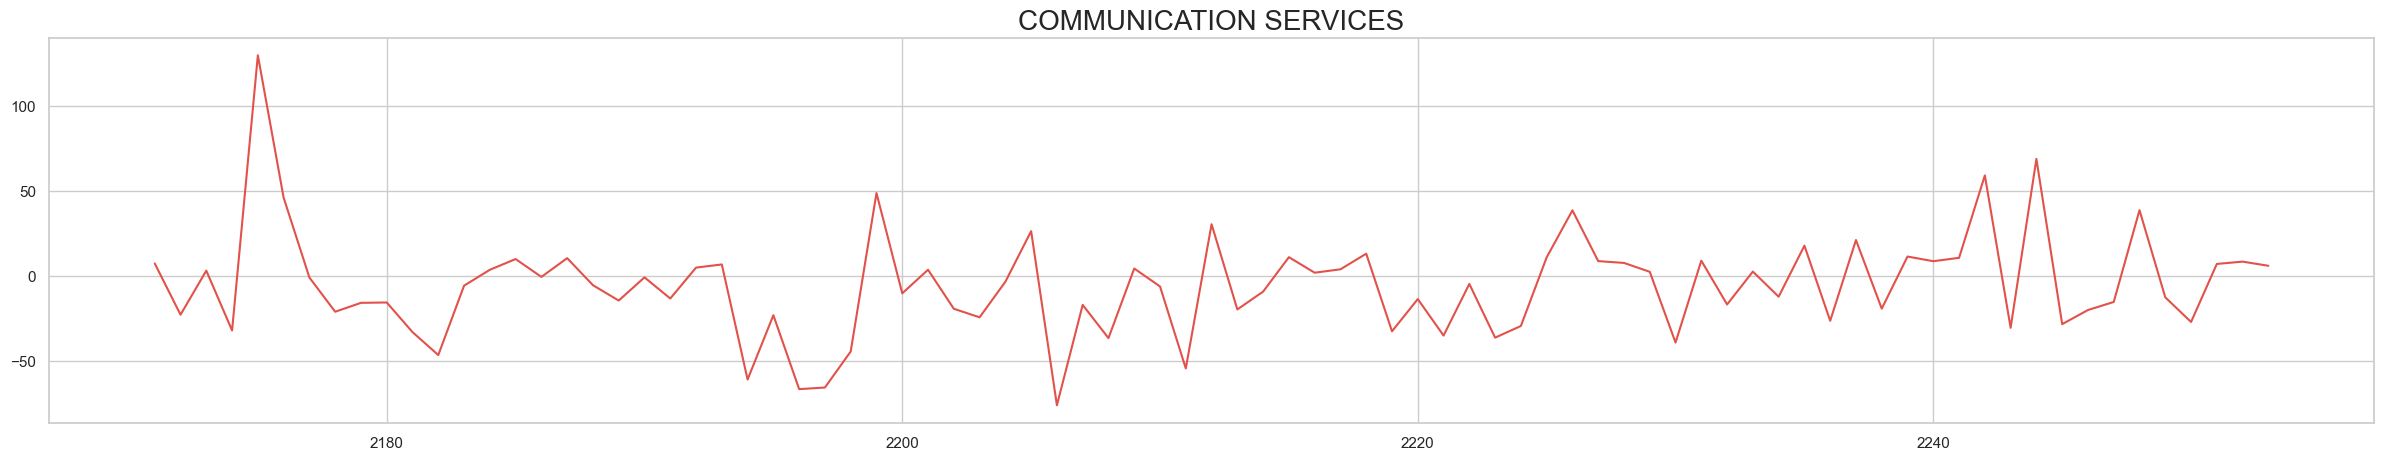

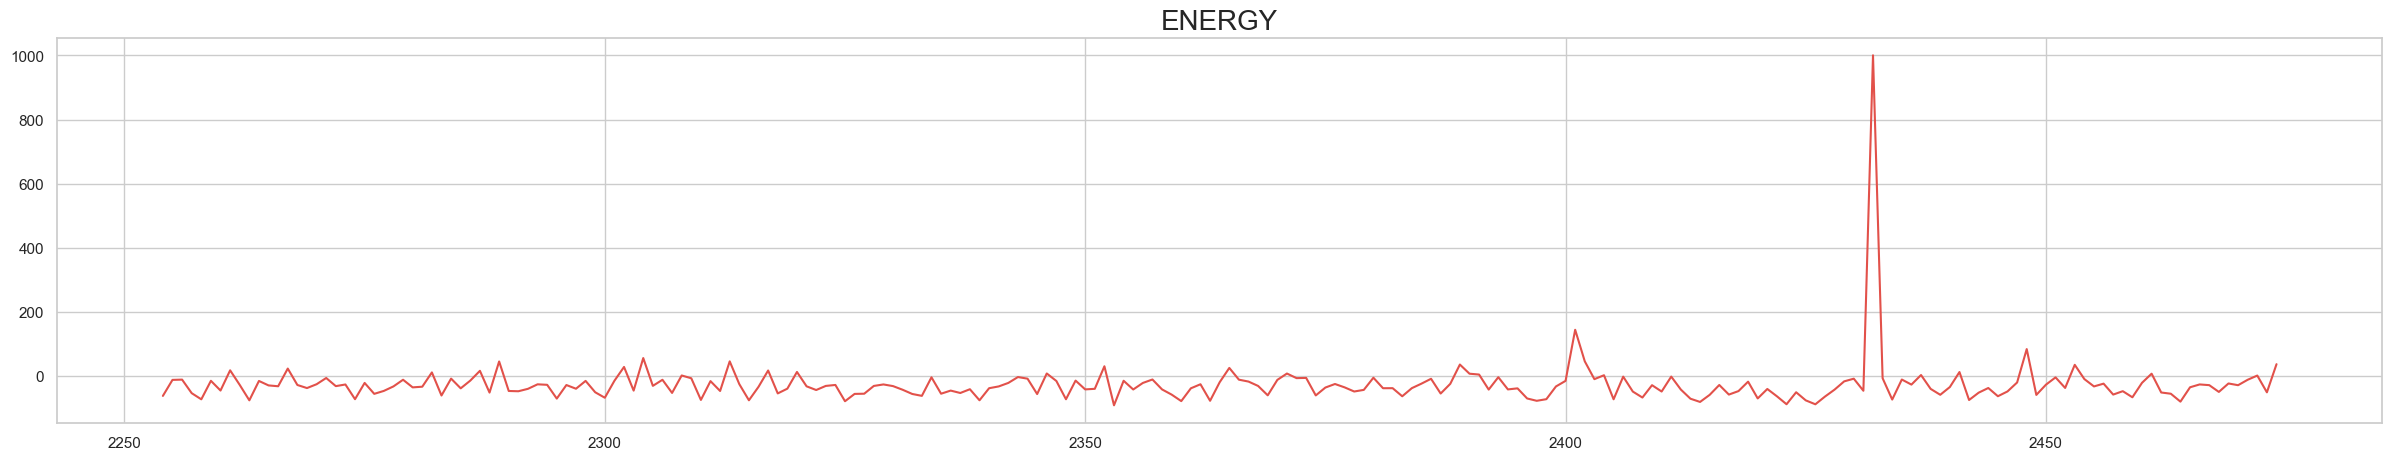

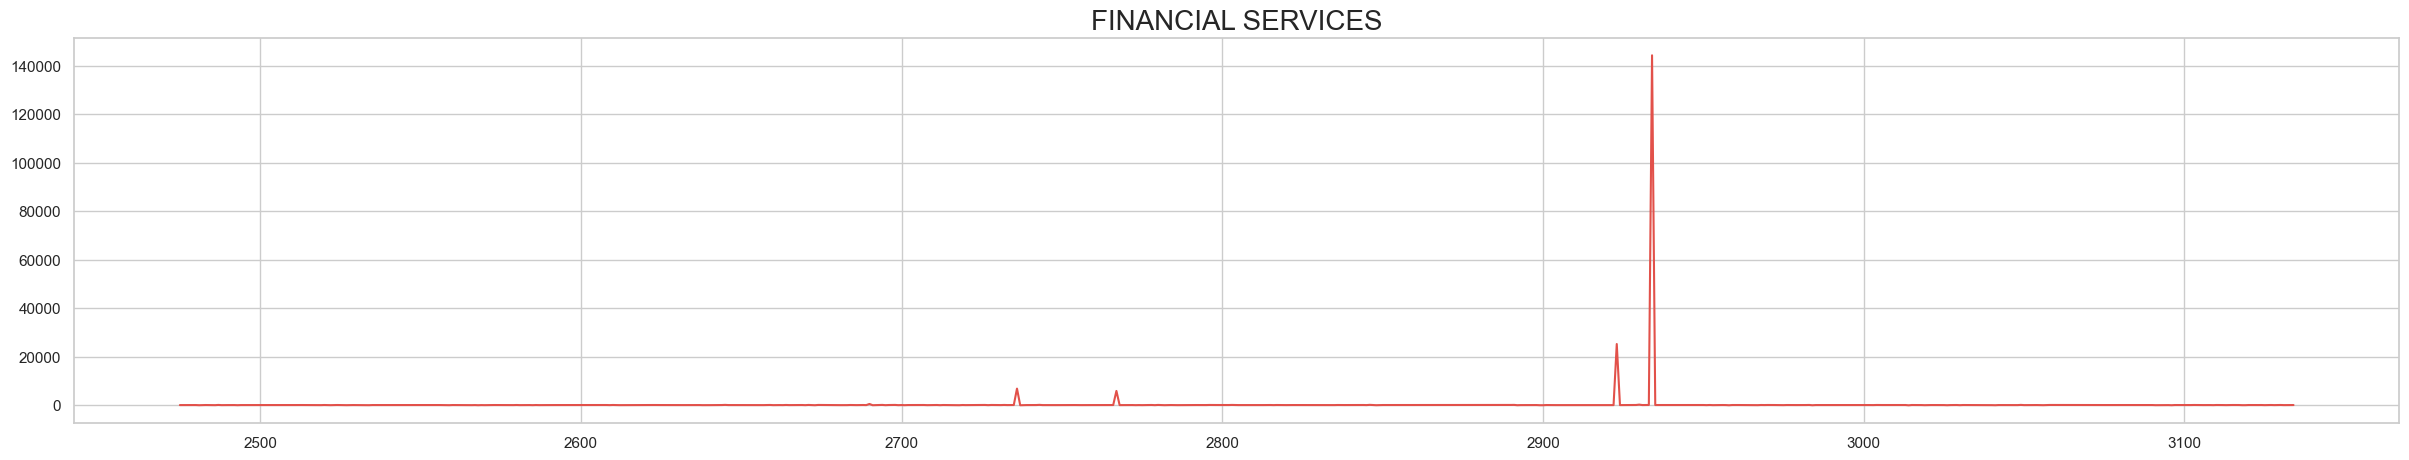

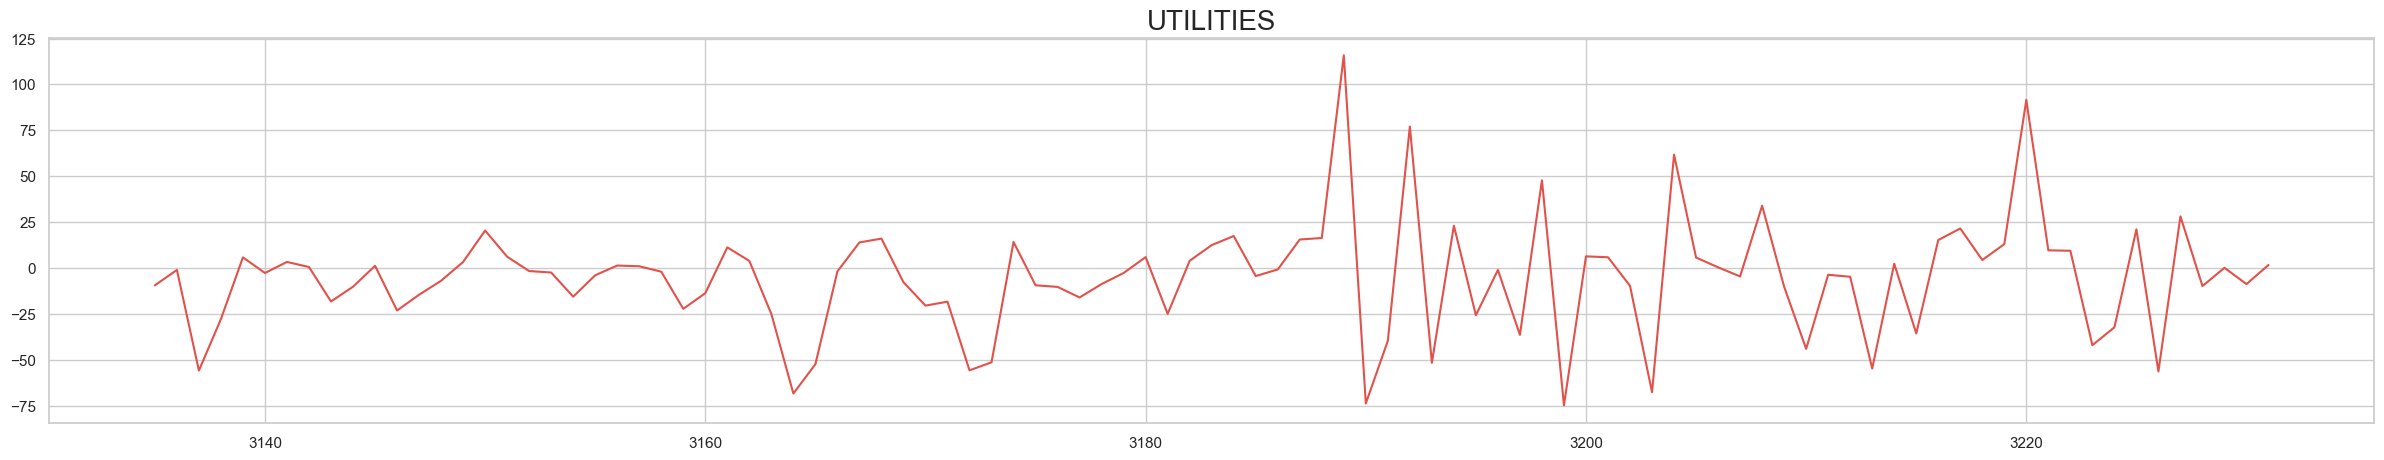

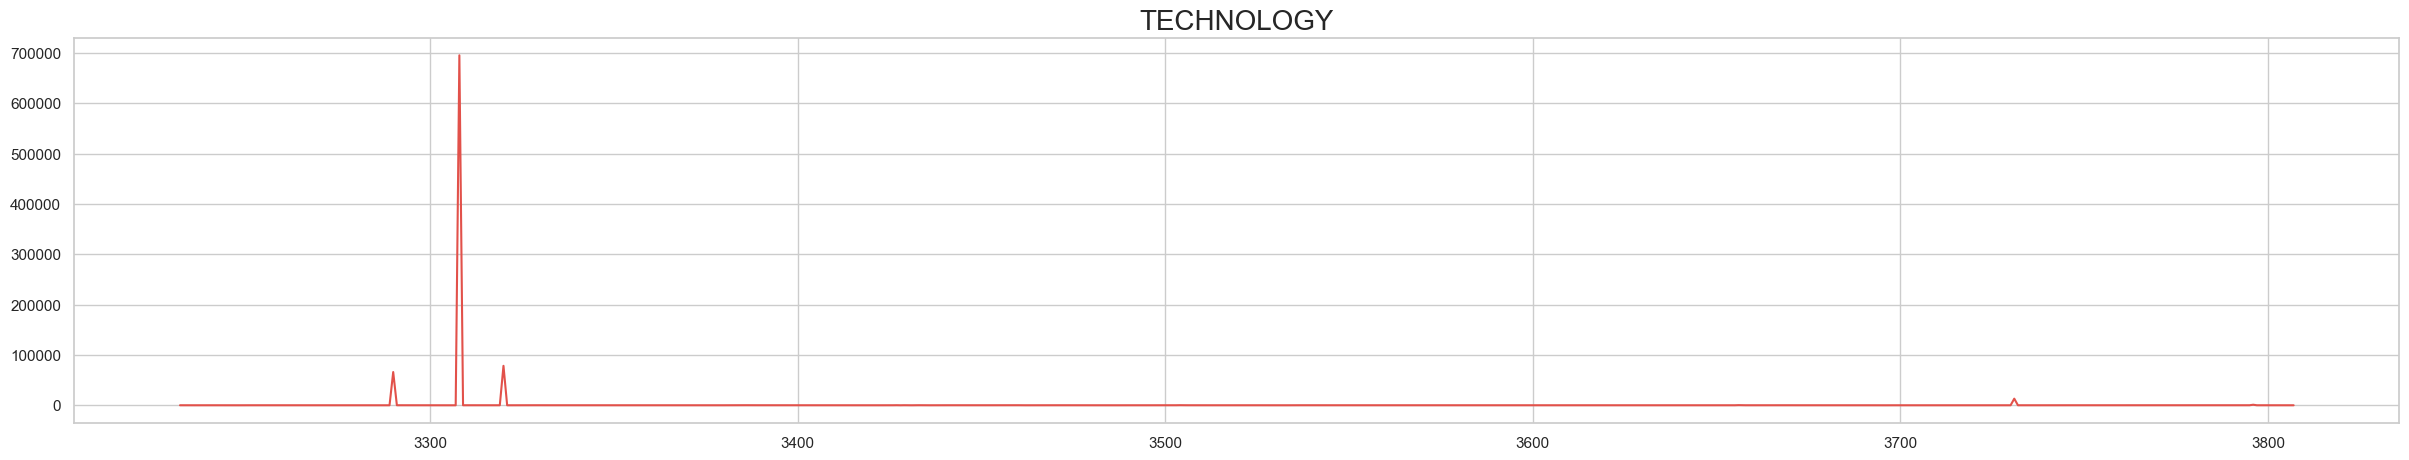

In [38]:
# Extract the columns we need in this step from the dataframe
df = df_2014
df_ = df.loc[:, ['Sector', '2015 PRICE VAR [%]']]

# Get list of sectors
sector_list = df_['Sector'].unique()

# Plot the percent price variation for each sector
for sector in sector_list:
    
    temp = df_[df_['Sector'] == sector]

    plt.figure(figsize=(30,5))
    plt.plot(temp['2015 PRICE VAR [%]'])
    plt.title(sector.upper(), fontsize=20)
    plt.show()

In [45]:
# !pip install yfinance
# Get stocks that increased more than 500%

import yfinance as yf



22 STOCKS with more than 500% gain.

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- 2068: No timezone found, symbol may be delisted


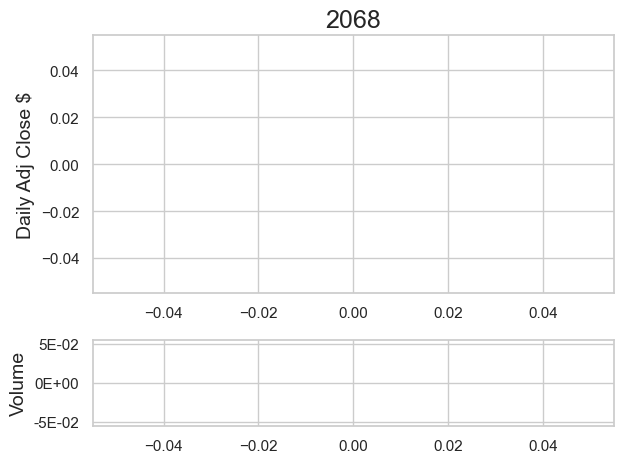

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- 3308: No timezone found, symbol may be delisted


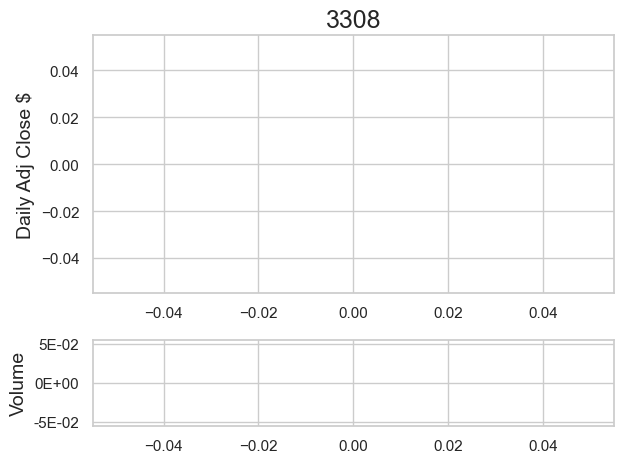

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- 794: No timezone found, symbol may be delisted


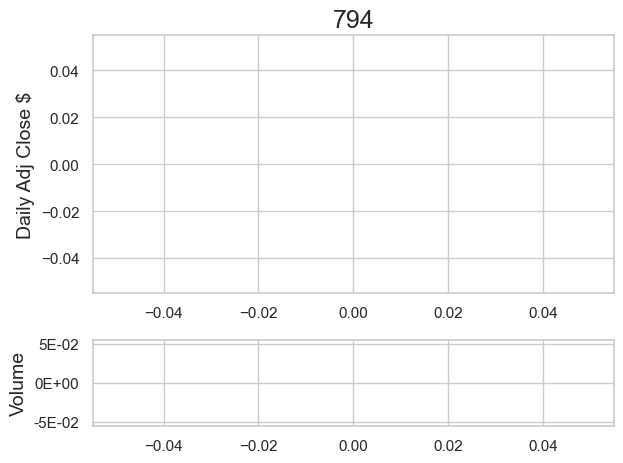

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- 2934: No timezone found, symbol may be delisted


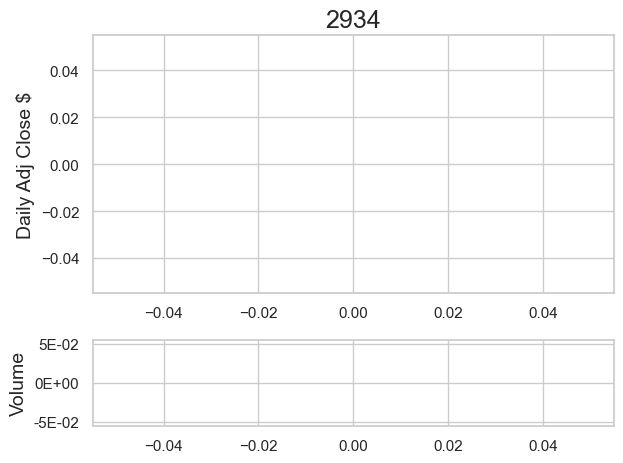

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- 3320: No timezone found, symbol may be delisted


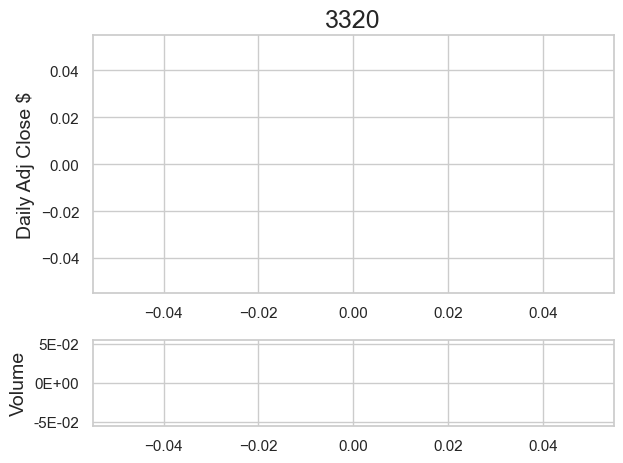

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- 3290: No timezone found, symbol may be delisted


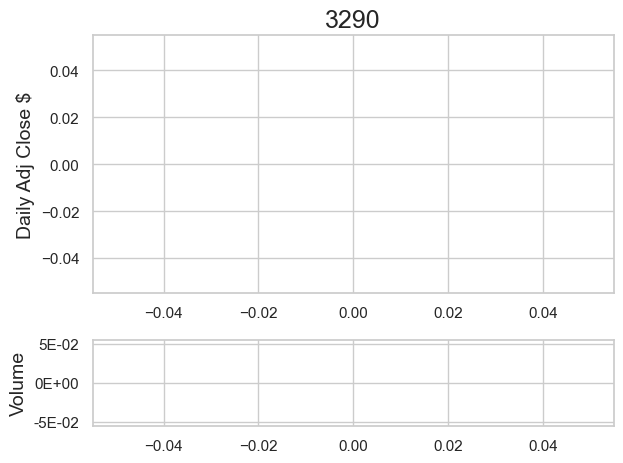

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- 237: No timezone found, symbol may be delisted


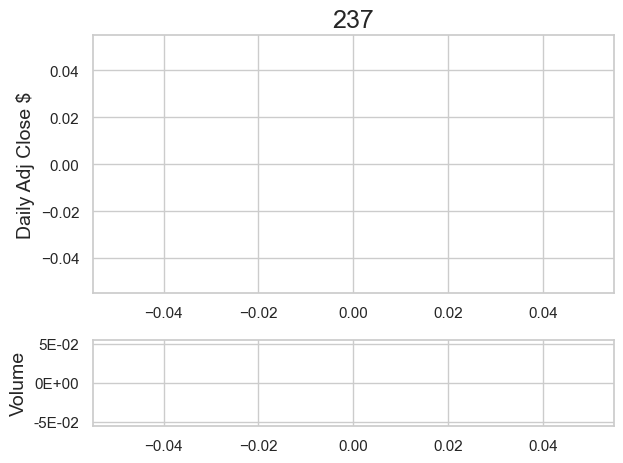

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- 2923: No timezone found, symbol may be delisted


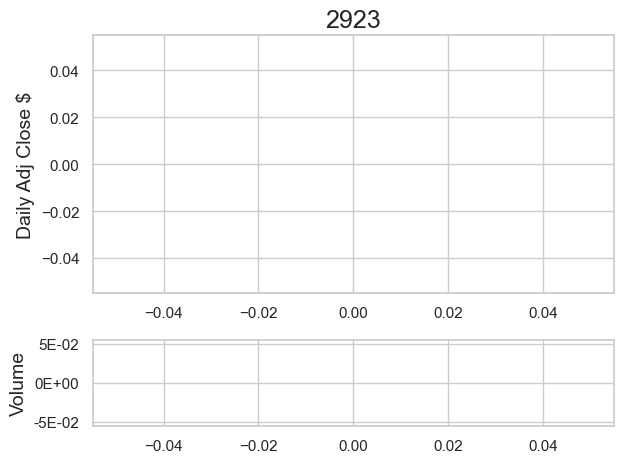

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- 1332: No timezone found, symbol may be delisted


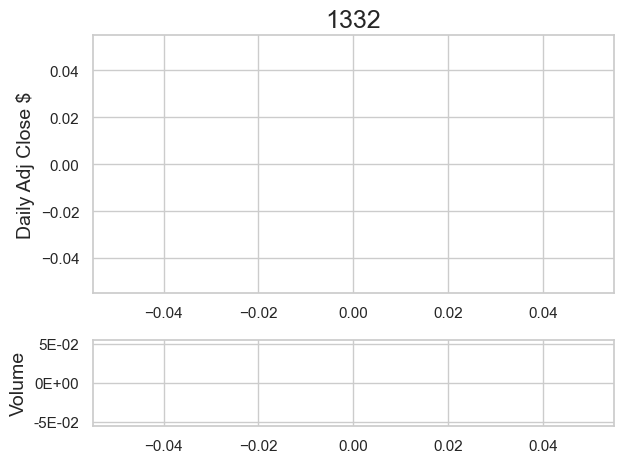

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- 905: No timezone found, symbol may be delisted


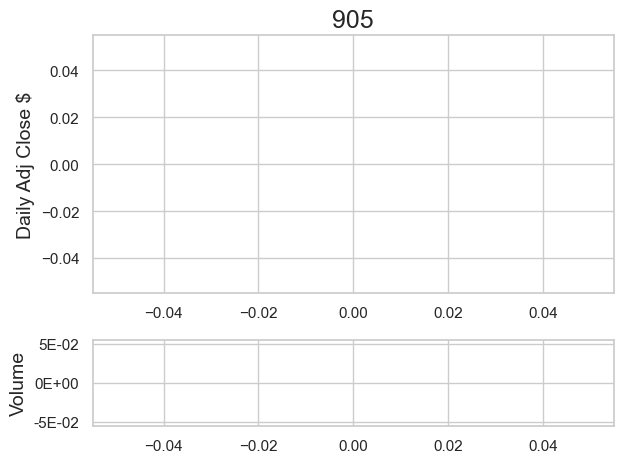

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- 3731: No timezone found, symbol may be delisted


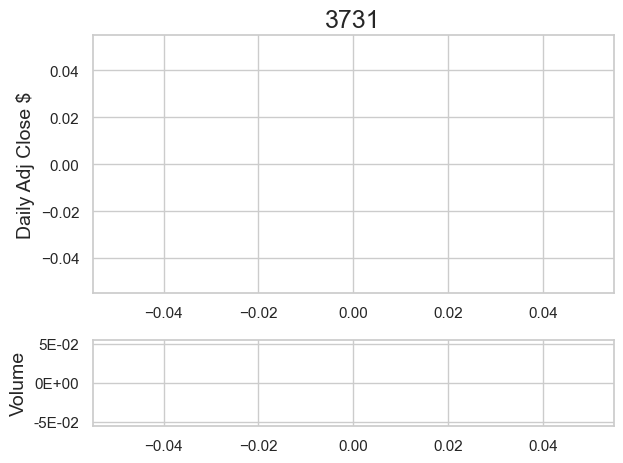

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- 739: No timezone found, symbol may be delisted


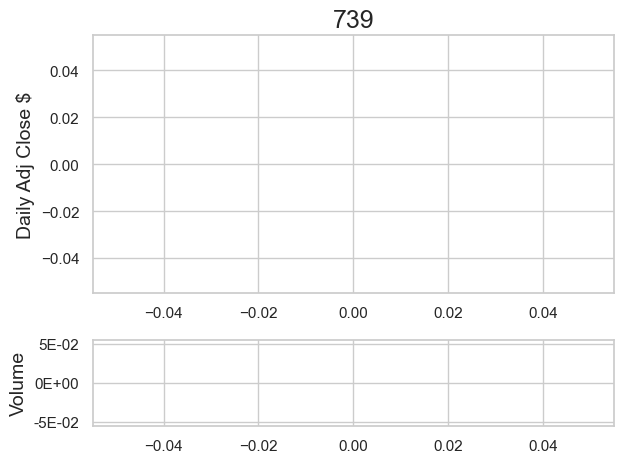

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- 2736: No timezone found, symbol may be delisted


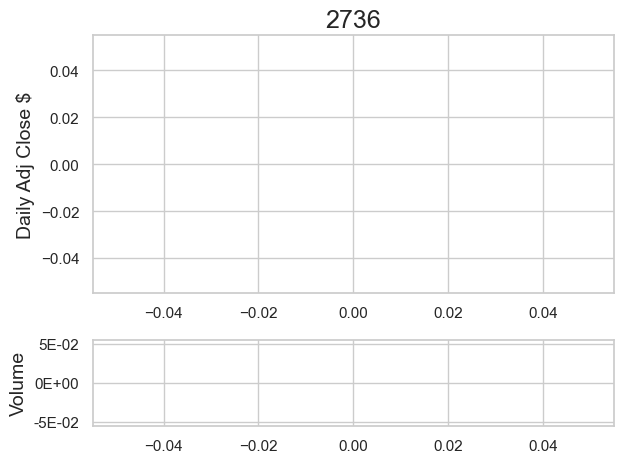

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- 2767: ValueError("time data '12-31-2015' does not match format '%Y-%m-%d'")


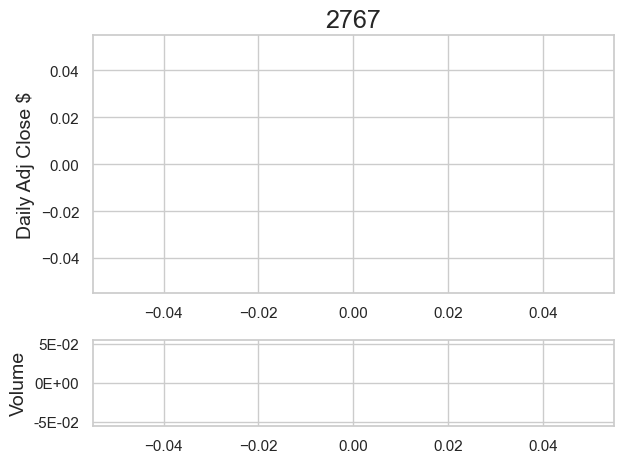

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- 2170: No timezone found, symbol may be delisted


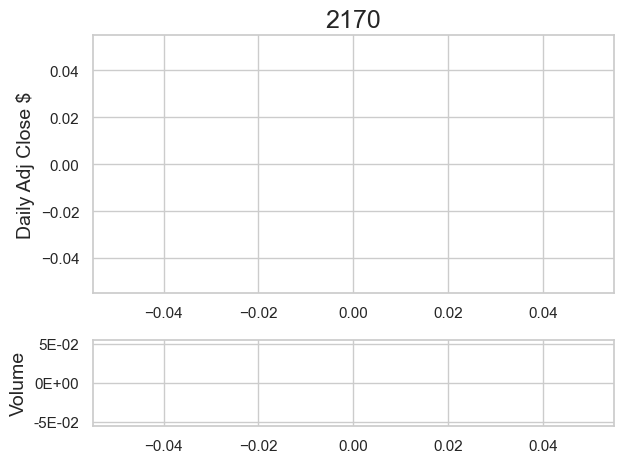

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- 126: No timezone found, symbol may be delisted


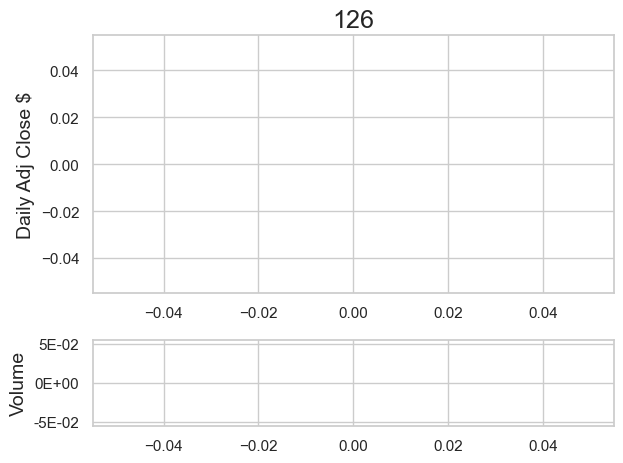

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- 206: No timezone found, symbol may be delisted


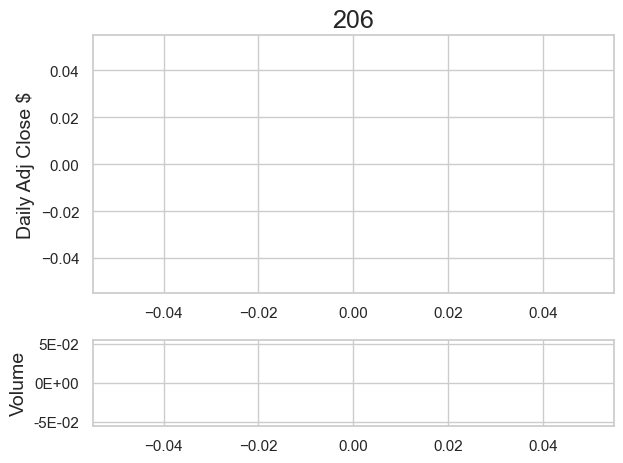

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- 638: No timezone found, symbol may be delisted


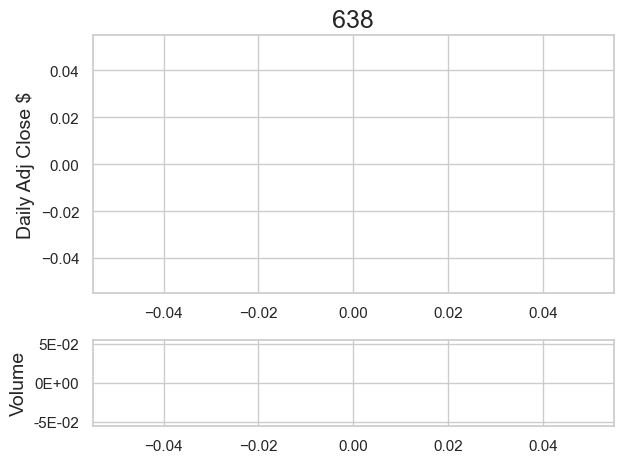

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- 3796: No timezone found, symbol may be delisted


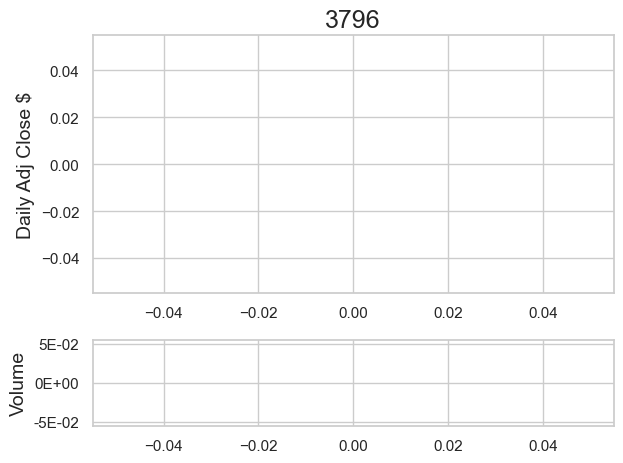

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- 2432: No timezone found, symbol may be delisted


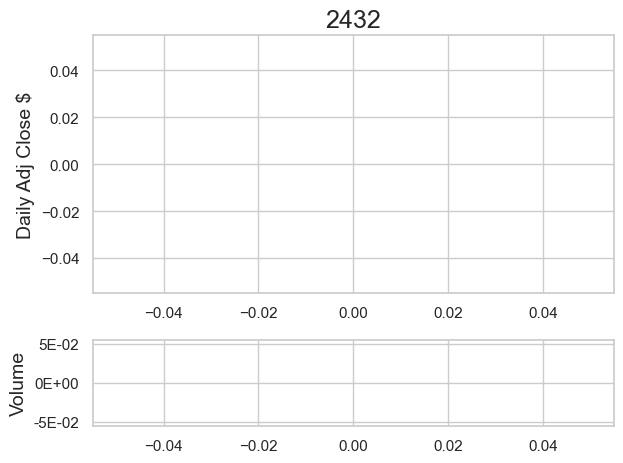

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- 768: No timezone found, symbol may be delisted


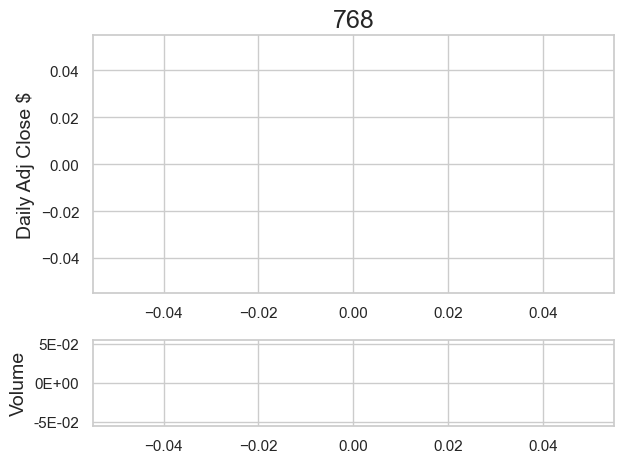

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- 561: No timezone found, symbol may be delisted


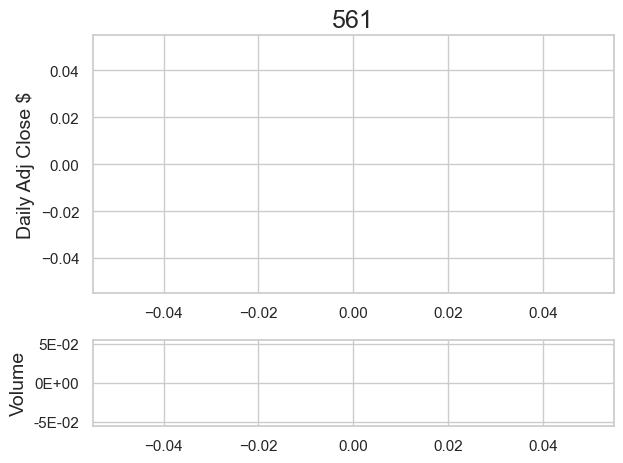

In [47]:
# Get stocks that increased more than 500%
gain = 500
top_gainers = df_var15[df_var15['2015 PRICE VAR [%]'] >= gain]
top_gainers = top_gainers['2015 PRICE VAR [%]'].sort_values(ascending=False)
print(f'{len(top_gainers)} STOCKS with more than {gain}% gain.')
print()

# Set
date_start = '01-01-2014'
date_end = '12-31-2015'
tickers = top_gainers.index.values.tolist()

for ticker in tickers:
    
    # Convert integer ticker to string
    ticker_str = str(ticker)
    
    # Pull daily prices for each ticker from Yahoo Finance
    daily_price = yf.download(ticker_str, start=date_start, end=date_end)
    
    # Plot prices with volume
    fig, (ax0, ax1) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [3, 1]})
    
    ax0.plot(daily_price['Adj Close'])
    ax0.set_title(ticker_str, fontsize=18)
    ax0.set_ylabel('Daily Adj Close $', fontsize=14)
    ax1.plot(daily_price['Volume'])
    ax1.set_ylabel('Volume', fontsize=14)
    ax1.yaxis.set_major_formatter(
            matplotlib.ticker.StrMethodFormatter('{x:.0E}'))

    fig.align_ylabels(ax1)
    fig.tight_layout()
    plt.show()
